In [1]:
from typing import List, Dict, Tuple, Optional, Any, Literal, Union



import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import plotly as pltl
import plotly.io as pio
import plotly.express as px
import plotly.subplots as sp

from scipy import stats
import os, math, re, difflib, warnings

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score

from xgboost import XGBClassifier

warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

import random
import numpy as np    # Numerical operations
import pandas as pd   # Data handling (DataFrames)
from pandas import DataFrame

import torch          # Required for TabNet
import tensorflow as tf  # Used for neural network models (MLP, CNN)

# Fix randomness for reproducible results
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    tf.random.set_seed(seed)


In [2]:
set_seed(42)

In [3]:
dataset_link = r"/content/Student_Mental_Stress_and_Coping_Mechanisms.csv"
df_unscaled = pd.read_csv(dataset_link)
df_unscaled


,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
0,802-17-3671,22,Female,2,9,2,12,2,1,1,3,5,9,No,1,Walking or Nature Walks,4,No,Yes,1
1,871-12-8572,25,Female,0,28,0,6,0,1,1,1,2,9,Yes,3,Meditation,2,Yes,No,1
2,495-13-2672,24,Female,0,45,3,12,10,3,3,1,4,9,Yes,5,Reading,1,Yes,Yes,3
3,365-77-2496,20,Male,2,8,7,7,4,1,3,2,5,1,No,1,Social Media Engagement,2,Yes,No,4
4,664-76-5622,28,Male,0,14,6,8,1,2,4,4,2,7,Yes,1,Exercise,1,Yes,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,826-89-7993,24,Genderfluid,2,50,4,11,8,5,2,4,5,2,Yes,1,Exercise,3,Yes,No,2
756,681-15-6754,23,Female,3,5,6,12,7,1,4,2,1,1,Yes,2,Meditation,4,Yes,No,1
757,714-33-5373,23,Male,1,17,3,11,5,2,4,3,3,9,Yes,5,Social Media Engagement,4,Yes,No,3
758,849-54-1252,29,Female,1,15,8,10,4,2,1,2,2,2,No,4,Meditation,4,No,Yes,3


In [4]:
dataset_link = r"/content/Student_Mental_Stress_and_Coping_Mechanisms.csv"
df = pd.read_csv(dataset_link)
df


,Student ID,Age,Gender,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use
0,802-17-3671,22,Female,2,9,2,12,2,1,1,3,5,9,No,1,Walking or Nature Walks,4,No,Yes,1
1,871-12-8572,25,Female,0,28,0,6,0,1,1,1,2,9,Yes,3,Meditation,2,Yes,No,1
2,495-13-2672,24,Female,0,45,3,12,10,3,3,1,4,9,Yes,5,Reading,1,Yes,Yes,3
3,365-77-2496,20,Male,2,8,7,7,4,1,3,2,5,1,No,1,Social Media Engagement,2,Yes,No,4
4,664-76-5622,28,Male,0,14,6,8,1,2,4,4,2,7,Yes,1,Exercise,1,Yes,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,826-89-7993,24,Genderfluid,2,50,4,11,8,5,2,4,5,2,Yes,1,Exercise,3,Yes,No,2
756,681-15-6754,23,Female,3,5,6,12,7,1,4,2,1,1,Yes,2,Meditation,4,Yes,No,1
757,714-33-5373,23,Male,1,17,3,11,5,2,4,3,3,9,Yes,5,Social Media Engagement,4,Yes,No,3
758,849-54-1252,29,Female,1,15,8,10,4,2,1,2,2,2,No,4,Meditation,4,No,Yes,3


In [5]:
def resolve_col(df, target):
    cols = list(df.columns)
 # 1) exact
    if target in cols:
        return target
 # 2) strip spaces exact
    stripped_map = {c.strip(): c for c in cols}
    if target.strip() in stripped_map:
        return stripped_map[target.strip()]
 # 3) collapse spaces + lowercase
    collapse_map = {re.sub(r'\s+', ' ', c.strip()).lower(): c for c in cols}
    key = re.sub(r'\s+', ' ', target.strip()).lower()
    if key in collapse_map:
        return collapse_map[key]
 # 4) accept underscores vs spaces
    key2 = key.replace('_', ' ')
    if key2 in collapse_map:
        return collapse_map[key2]
 # 5) fuzzy match
    hit = difflib.get_close_matches(target, cols, n=1, cutoff=0.6)
    if hit:
        return hit[0]
 # 6) substring fallback
    key3 = key.replace(' ', '')
    for c in cols:
        if key3 in c.lower().replace(' ', ''):
            return c
    raise KeyError(f"Could not find a column similar to '{target}'. Available columns: {cols}")


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Student ID                          760 non-null    object
 1   Age                                 760 non-null    int64 
 2   Gender                              760 non-null    object
 3   Academic Performance (GPA)          760 non-null    int64 
 4   Study Hours Per Week                760 non-null    int64 
 5   Social Media Usage (Hours per day)  760 non-null    int64 
 6   Sleep Duration (Hours per night)    760 non-null    int64 
 7   Physical Exercise (Hours per week)  760 non-null    int64 
 8   Family Support                      760 non-null    int64 
 9   Financial Stress                    760 non-null    int64 
 10  Peer Pressure                       760 non-null    int64 
 11  Relationship Stress                 760 non-null    int64 

In [7]:
df.describe()

,Age,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Relationship Stress,Mental Stress Level,Diet Quality,Cognitive Distortions,Substance Use
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,23.919737,1.996053,29.130263,4.234211,8.093421,4.934211,2.972368,3.021053,2.982895,2.963158,5.363158,3.042105,3.007895,2.996053
std,3.819392,1.416535,18.104662,2.565174,2.596838,3.082679,1.413477,1.452662,1.391096,1.369231,2.902856,1.453111,1.432703,1.385502
min,18.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,21.000000,1.000000,13.000000,2.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,24.000000,2.000000,29.000000,4.000000,8.000000,5.000000,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,3.000000
75%,27.000000,3.000000,45.000000,7.000000,10.000000,8.000000,4.000000,4.000000,4.000000,4.000000,8.000000,4.000000,4.000000,4.000000
max,30.000000,4.000000,60.000000,8.000000,12.000000,10.000000,5.000000,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000


In [8]:
df.isnull().sum()

,0
Student ID,0
Age,0
Gender,0
Academic Performance (GPA),0
Study Hours Per Week,0
Social Media Usage (Hours per day),0
Sleep Duration (Hours per night),0
Physical Exercise (Hours per week),0
Family Support,0
Financial Stress,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df2=df.copy()

In [11]:
df3=df.copy()

In [12]:
def safe_drop(df: DataFrame, column) -> DataFrame:
    return df.drop(columns=column) if column in df.columns else df

useless_columns = ['Age','Student ID','Substance Use', 'Relationship Stress','Gender']
for col in useless_columns:
    df = safe_drop(df, col)

# Preview columns
df.columns.tolist()

['Academic Performance (GPA)',
 'Study Hours Per Week',
 'Social Media Usage (Hours per day)',
 'Sleep Duration (Hours per night)',
 'Physical Exercise (Hours per week)',
 'Family Support  ',
 'Financial Stress',
 'Peer Pressure',
 'Mental Stress Level',
 'Counseling Attendance',
 'Diet Quality',
 'Stress Coping Mechanisms',
 'Cognitive Distortions',
 'Family Mental Health History',
 'Medical Condition']

In [13]:
useless_columns = ['Age','Student ID','Substance Use', 'Relationship Stress','Gender']
for col in useless_columns:
    df2 = safe_drop(df3, col)

In [14]:
def resolve_col(df, target):
    cols = list(df.columns)
 # 1) exact
    if target in cols:
        return target
 # 2) strip spaces exact
    stripped_map = {c.strip(): c for c in cols}
    if target.strip() in stripped_map:
        return stripped_map[target.strip()]
 # 3) collapse spaces + lowercase
    collapse_map = {re.sub(r'\s+', ' ', c.strip()).lower(): c for c in cols}
    key = re.sub(r'\s+', ' ', target.strip()).lower()
    if key in collapse_map:
        return collapse_map[key]
 # 4) accept underscores vs spaces
    key2 = key.replace('_', ' ')
    if key2 in collapse_map:
        return collapse_map[key2]
 # 5) fuzzy match
    hit = difflib.get_close_matches(target, cols, n=1, cutoff=0.6)
    if hit:
        return hit[0]
 # 6) substring fallback
    key3 = key.replace(' ', '')
    for c in cols:
        if key3 in c.lower().replace(' ', ''):
            return c
    raise KeyError(f"Could not find a column similar to '{target}'. Available columns: {cols}")


#Scaling and Encoding

In [15]:
binary_targets = [
    "Counseling Attendance",
    "Family Mental Health History",
    "Medical Condition"
]
binary_cols = [resolve_col(df, c) for c in binary_targets]

In [16]:
numeric_targets = [
    "Academic Performance (GPA)",
    "Study Hours Per Week",
    "Social Media Usage (Hours per day)",
    "Sleep Duration (Hours per night)",
    "Physical Exercise (Hours per week)",
    "Family Support  ",
    "Financial Stress",
    "Peer Pressure",
    "Mental Stress Level",
    "Diet Quality",
    "Cognitive Distortions"
]
numeric_cols = [resolve_col(df, c) for c in numeric_targets]

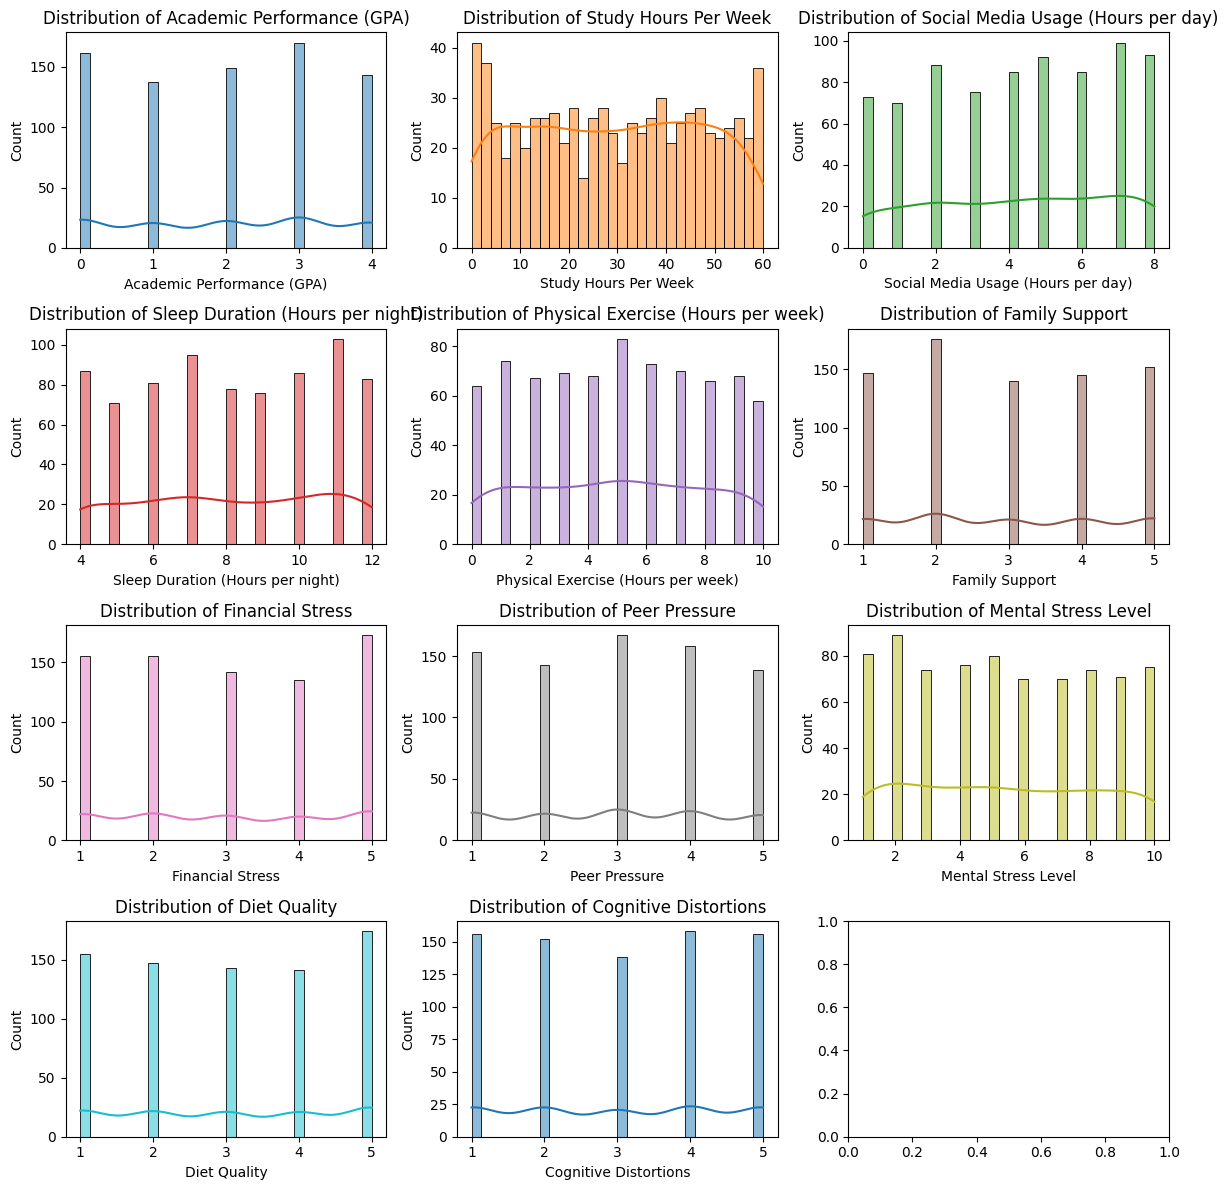

In [17]:
#Distibution of Various Academic Metrics¶
ncols = 3
nrows = int(np.ceil(len(numeric_targets) / ncols))

colors = sns.color_palette("tab10", len(numeric_targets))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 3))
axes = axes.flatten()

for ax, col, color in zip(axes, numeric_targets, colors):
    sns.histplot(df[col], bins=30, kde=True, color=color, ax=ax)
    ax.set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


In [18]:
print("Resolved binary columns:", dict(zip(binary_targets, binary_cols)))
print("Resolved numeric columns:", dict(zip(numeric_targets, numeric_cols)))

Resolved binary columns: {'Counseling Attendance': 'Counseling Attendance', 'Family Mental Health History': 'Family Mental Health History', 'Medical Condition': 'Medical Condition'}
Resolved numeric columns: {'Academic Performance (GPA)': 'Academic Performance (GPA)', 'Study Hours Per Week': 'Study Hours Per Week', 'Social Media Usage (Hours per day)': 'Social Media Usage (Hours per day)', 'Sleep Duration (Hours per night)': 'Sleep Duration (Hours per night)', 'Physical Exercise (Hours per week)': 'Physical Exercise (Hours per week)', 'Family Support  ': 'Family Support  ', 'Financial Stress': 'Financial Stress', 'Peer Pressure': 'Peer Pressure', 'Mental Stress Level': 'Mental Stress Level', 'Diet Quality': 'Diet Quality', 'Cognitive Distortions': 'Cognitive Distortions'}


In [19]:
# Label-encode binary columns
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [20]:
# One-hot encode coping strategies (auto-detect column name)
coping_col = difflib.get_close_matches("Stress Coping Mechanisms", df.columns, n=1, cutoff=0.4)
if coping_col:
    df = pd.get_dummies(df, columns=[coping_col[0]], drop_first=True)

# Scale numeric columns
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head(3)


,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Mental Stress Level,Counseling Attendance,...,Medical Condition,Stress Coping Mechanisms_Meditation,Stress Coping Mechanisms_Reading,Stress Coping Mechanisms_Social Media Engagement,Stress Coping Mechanisms_Spending Time Alone,Stress Coping Mechanisms_Talking to Friends,Stress Coping Mechanisms_Travelling,Stress Coping Mechanisms_Walking or Nature Walks,Stress Coping Mechanisms_Watching Sports,Stress Coping Mechanisms_Yoga
0,0.002788,-1.112615,-0.871552,1.505351,-0.952465,-1.396321,-1.392191,0.012304,1.253675,0,...,1,False,False,False,False,False,False,True,False,False
1,-1.410037,-0.062471,-1.651739,-0.806673,-1.601678,-1.396321,-1.392191,-1.426358,1.253675,1,...,0,True,False,False,False,False,False,False,False,False
2,-1.410037,0.877133,-0.481458,1.505351,1.644389,0.019562,-0.014502,-1.426358,1.253675,1,...,1,False,True,False,False,False,False,False,False,False


In [21]:
def numerical_to_numerical_correlation(df, features, target_column, features_name="Selected Features"):
    numeric_df = df.select_dtypes(include=['number'])
    features = [feat for feat in features if feat != target_column]

    plt.figure(figsize=(12, 6))
    sns.heatmap(
        numeric_df.corr().loc[features, [target_column]].sort_values(by=target_column, ascending=False),
        annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5
    )
    plt.title(f"Correlation Between {target_column} and {features_name}".replace("_", " "))
    plt.show()

#ORIGINAL AUTOENCODER

In [22]:
import re, difflib, numpy as np, pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


In [23]:
# the AE feature set you want to train on
core_features = [
    "Mental Stress Level",
    "Peer Pressure",
    "Financial Stress",
    "Family Support  ",                         # note: no trailing spaces
    "Diet Quality",
    "Sleep Duration (Hours per night)",
    "Study Hours Per Week",
    "Social Media Usage (Hours per day)",
    "Physical Exercise (Hours per week)",
    "Cognitive Distortions",
    "Medical Condition",
    "Counseling Attendance"
]
ae_cols  = [resolve_col(df, c) for c in core_features]


In [24]:
#  Autoencoder architecture + training (on scaled df)
X_core = df[ae_cols].values
d = X_core.shape[1]
inp = Input(shape=(d,))

In [25]:

# Encoder
x = Dense(32, activation="relu")(inp)
x = BatchNormalization()(x)
x = Dropout(0.10)(x)

x = Dense(16, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.10)(x)

bottleneck = Dense(4, activation="relu")(x)

# Decoder
x = Dense(16, activation="relu")(bottleneck)
x = BatchNormalization()(x)

x = Dense(32, activation="relu")(x)
x = BatchNormalization()(x)

out = Dense(d, activation="linear")(x)

auto = Model(inp, out)
auto.compile(optimizer=Adam(1e-3), loss="mse")

history = auto.fit(
    X_core, X_core,
    epochs=120,
    batch_size=16,
    validation_split=0.15,
    callbacks=[EarlyStopping(patience=12, restore_best_weights=True)],
    verbose=1
)


Epoch 1/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 2.1718 - val_loss: 0.9072
Epoch 2/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1663 - val_loss: 0.8920
Epoch 3/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9588 - val_loss: 0.8724
Epoch 4/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8943 - val_loss: 0.8534
Epoch 5/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8491 - val_loss: 0.8306
Epoch 6/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7979 - val_loss: 0.8167
Epoch 7/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7916 - val_loss: 0.8026
Epoch 8/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7728 - val_loss: 0.7838
Epoch 9/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7614 - val_loss: 0.7738
Epoch 10/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7586 - val_loss: 0.7662
Epoch 11/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7364 - val_loss: 0.7607
Epoch 12/120
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

In [26]:
#  Standard reconstruction risk + label (on scaled df)
recon_scaled = auto.predict(X_core, verbose=0)
df["Risk_Score"] = ((X_core - recon_scaled) ** 2).mean(axis=1)

thr = df["Risk_Score"].quantile(0.75)  # top 25% as Need Support
df["Needs_Support"] = (df["Risk_Score"] >= thr).astype(int)

# push AE outputs to interpretable df3
df2["Risk_Score"] = df["Risk_Score"]
df2["Needs_Support"] = df["Needs_Support"]
R = X_core - recon_scaled  # shape: (n_samples, d)

# Autoencoder Training Visualization

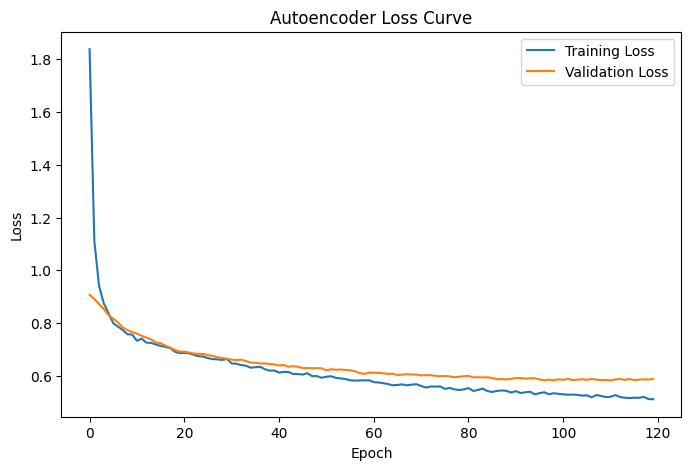

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


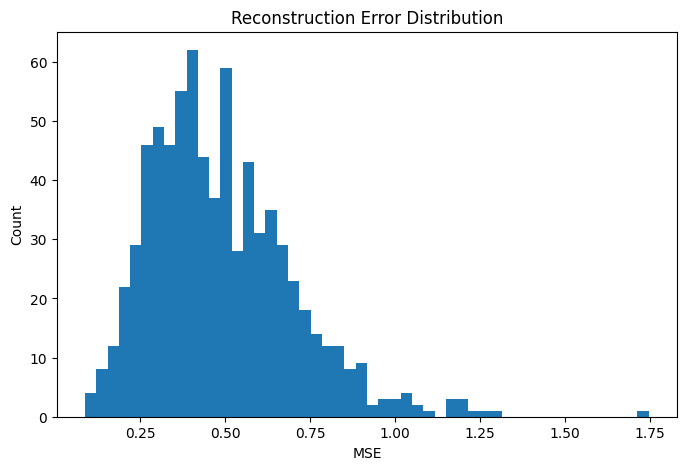

In [27]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Autoencoder Loss Curve')
plt.legend(); plt.show()

reconstructed = auto.predict(X_core)
mse = ((X_core - reconstructed)**2).mean(axis=1)
plt.figure(figsize=(8,5))
plt.hist(mse, bins=50)
plt.title("Reconstruction Error Distribution"); plt.xlabel("MSE"); plt.ylabel("Count")
plt.show()


<Axes: xlabel='risk_cluster', ylabel='Risk_Score'>

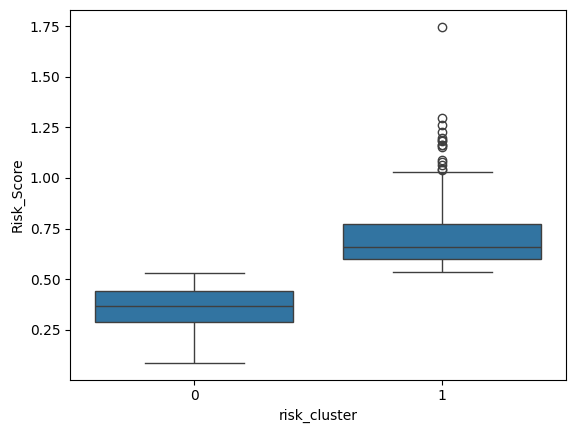

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
df2["risk_cluster"] = kmeans.fit_predict(df2[["Risk_Score"]])
sns.boxplot(x="risk_cluster", y="Risk_Score", data=df2)


In [30]:
df[core_features + ["Risk_Score"]].corr()["Risk_Score"].sort_values(ascending=False)

,Risk_Score
Risk_Score,1.000000
Counseling Attendance,0.103155
Family Support,0.071174
Financial Stress,0.064140
Physical Exercise (Hours per week),0.061352
Medical Condition,0.030219
Social Media Usage (Hours per day),0.001491
Study Hours Per Week,-0.005345
Cognitive Distortions,-0.023285
Diet Quality,-0.034974


In [31]:
df2.head()

,Student ID,Age,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,...,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use,Risk_Score,Needs_Support,risk_cluster
0,802-17-3671,22,2,9,2,12,2,1,1,3,...,No,1,Walking or Nature Walks,4,No,Yes,1,0.488350,0,0
1,871-12-8572,25,0,28,0,6,0,1,1,1,...,Yes,3,Meditation,2,Yes,No,1,0.744449,1,1
2,495-13-2672,24,0,45,3,12,10,3,3,1,...,Yes,5,Reading,1,Yes,Yes,3,0.896245,1,1
3,365-77-2496,20,2,8,7,7,4,1,3,2,...,No,1,Social Media Engagement,2,Yes,No,4,0.625071,1,1
4,664-76-5622,28,0,14,6,8,1,2,4,4,...,Yes,1,Exercise,1,Yes,No,3,0.421382,0,0


#AE analysis

In [32]:
# How many in each class?
print(df2["Needs_Support"].value_counts())
print(df2["Needs_Support"].value_counts(normalize=True))  # proportion


Needs_Support
0    570
1    190
Name: count, dtype: int64
Needs_Support
0    0.75
1    0.25
Name: proportion, dtype: float64


In [56]:
X_numeric = df[core_features].values

recon1 = auto.predict(X_numeric, verbose=0)
recon2 = auto.predict(X_numeric, verbose=0)

risk1 = ((X_numeric - recon1)**2).mean(axis=1)
risk2 = ((X_numeric - recon2)**2).mean(axis=1)

df['stability'] = np.abs(risk1 - risk2)
df['stability'].describe()

,stability
count,760.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [34]:
import pandas as pd

# Choose numeric columns except the label itself
num_cols = df2.select_dtypes(include=["int64", "float64"]).columns
num_cols = [c for c in num_cols if c not in ["Needs_Support"]]  # keep Risk_Score if you want

summary_num = (
    df2
    .groupby("Needs_Support")[num_cols]
    .agg(["mean", "std", "median"])
    .T  # transpose for easier reading
)

print(summary_num)


Needs_Support                                      0          1
Age                                mean    23.956140  23.810526
                                   std      3.802206   3.878566
                                   median  24.000000  24.000000
Academic Performance (GPA)         mean     1.968421   2.078947
                                   std      1.403881   1.454451
                                   median   2.000000   2.000000
Study Hours Per Week               mean    29.368421  28.415789
                                   std     16.988605  21.136261
                                   median  29.000000  27.500000
Social Media Usage (Hours per day) mean     4.219298   4.278947
                                   std      2.517282   2.710177
                                   median   4.000000   4.000000
Sleep Duration (Hours per night)   mean     8.129825   7.984211
                                   std      2.455364   2.985815
                                   media

In [35]:
cat_cols = df2.select_dtypes(include=["object", "category", "bool"]).columns

for col in cat_cols:
    print(f"\nFeature: {col}")
    print(
        pd.crosstab(df2[col], df2["Needs_Support"],
                    normalize="columns")  # percentages within each label
        .round(3)
    )



Feature: Student ID
Needs_Support      0      1
Student ID                 
100-42-4509    0.002  0.000
102-51-9968    0.002  0.000
102-53-4424    0.000  0.005
103-34-9967    0.002  0.000
107-84-6181    0.002  0.000
...              ...    ...
896-76-6435    0.002  0.000
897-17-0811    0.000  0.005
897-18-9984    0.002  0.000
897-73-6775    0.000  0.005
897-98-3172    0.002  0.000

[760 rows x 2 columns]

Feature: Counseling Attendance
Needs_Support              0      1
Counseling Attendance              
No                     0.525  0.463
Yes                    0.475  0.537

Feature: Stress Coping Mechanisms
Needs_Support                 0      1
Stress Coping Mechanisms              
Exercise                  0.095  0.058
Meditation                0.095  0.116
Reading                   0.118  0.126
Social Media Engagement   0.091  0.142
Spending Time Alone       0.102  0.047
Talking to Friends        0.077  0.084
Travelling                0.118  0.095
Walking or Nature Walks   0.0

In [37]:
# Top 3 highest-risk examples with label 1
print("\nTop 3 highest-risk Needs_Support=1 examples")
display(
    df2[df2["Needs_Support"] == 1]
      .sort_values("Risk_Score", ascending=False)
      .head(3)
)

# 3 low-risk examples with label 0
print("\n3 lowest-risk Needs_Support=0 examples")
display(
    df2[df2["Needs_Support"] == 0]
      .sort_values("Risk_Score", ascending=True)
      .head(3)
)



Top 3 highest-risk Needs_Support=1 examples


,Student ID,Age,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,...,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use,Risk_Score,Needs_Support,risk_cluster
710,830-78-6799,19,0,1,8,9,10,5,2,5,...,Yes,2,Travelling,5,Yes,Yes,5,1.746406,1,1
683,692-18-6999,30,0,1,6,9,9,4,4,4,...,Yes,5,Meditation,4,No,Yes,5,1.297577,1,1
740,745-98-9303,19,3,1,0,11,10,4,4,1,...,Yes,3,Reading,3,Yes,Yes,2,1.259870,1,1



3 lowest-risk Needs_Support=0 examples


,Student ID,Age,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,...,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use,Risk_Score,Needs_Support,risk_cluster
427,428-78-6391,21,0,36,8,5,5,2,3,1,...,Yes,3,Reading,3,No,No,2,0.087053,0,0
39,295-62-4300,23,4,25,5,8,6,2,1,4,...,No,5,Social Media Engagement,4,Yes,No,2,0.096775,0,0
220,412-84-5105,27,3,15,1,9,2,2,5,3,...,No,3,Talking to Friends,4,No,No,5,0.101142,0,0


In [39]:
# define risky direction per resolved column name
direction_map = {
    resolve_col(df, "Mental Stress Level"): +1,
    resolve_col(df, "Peer Pressure"): +1,
    resolve_col(df, "Financial Stress"): +1,
    resolve_col(df, "Family Support"): -1,
    resolve_col(df, "Diet Quality"): -1,
    resolve_col(df, "Sleep Duration (Hours per night)"): -1,
    resolve_col(df, "Study Hours Per Week"): -1,
    resolve_col(df, "Social Media Usage (Hours per day)"): +1,
    resolve_col(df, "Physical Exercise (Hours per week)"): -1,
    resolve_col(df, "Cognitive Distortions"): +1,
    resolve_col(df, "Medical Condition"): +1,                    # encoded 1 can increase risk
    resolve_col(df, "Counseling Attendance"): -1                 # attending is usually protective; set 0 if neutral
}
# weights to reduce impact of very noisy columns
var = np.var(X_core, axis=0, ddof=1)
w = 1.0 / np.maximum(var, 1e-6)


In [40]:
# build one-sided residual matrix
R_one = np.zeros_like(R)
for j, col in enumerate(ae_cols):
    s = direction_map.get(col, 0)
    if s == +1:
        R_one[:, j] = np.maximum(R[:, j], 0.0)   # only harmful positive dev
    elif s == -1:
        R_one[:, j] = np.minimum(R[:, j], 0.0)   # only harmful negative dev
    else:
        R_one[:, j] = R[:, j]                    # both sides risky

# directional weighted risk
df["Risk_Score_dir"] = (w * (R_one ** 2)).mean(axis=1)
thr_dir = df["Risk_Score_dir"].quantile(0.75)
df["Needs_Support_dir"] = (df["Risk_Score_dir"] >= thr_dir).astype(int)

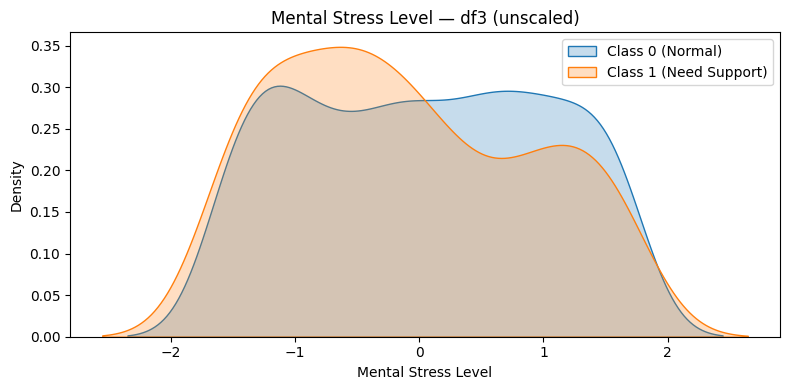

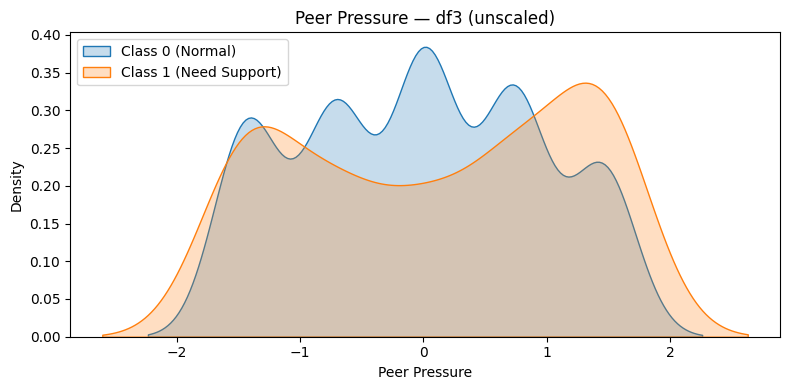

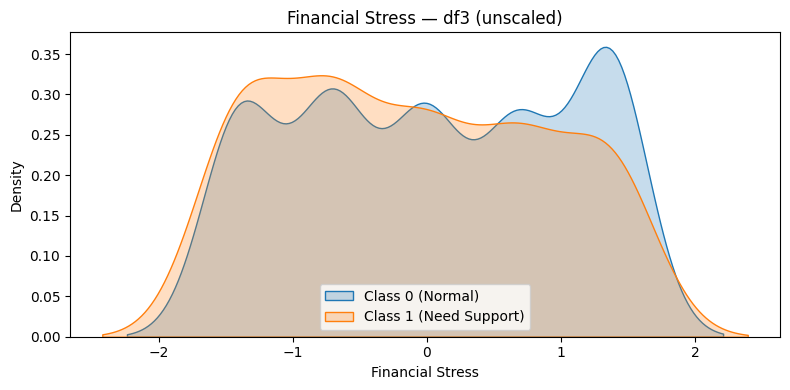

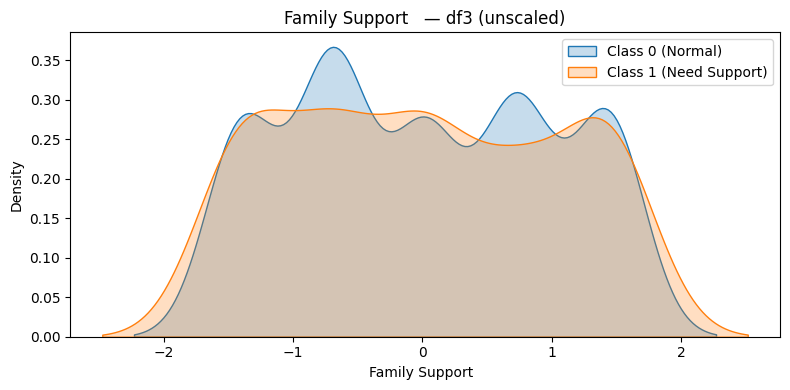

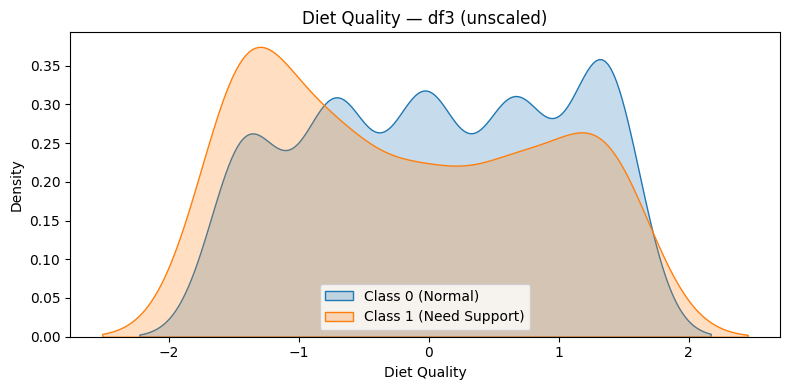

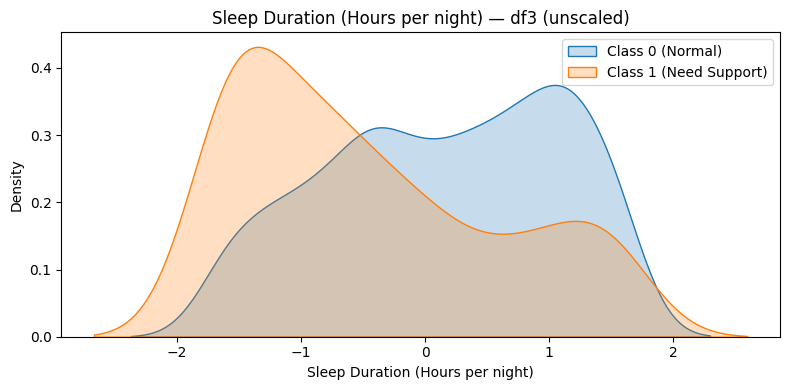

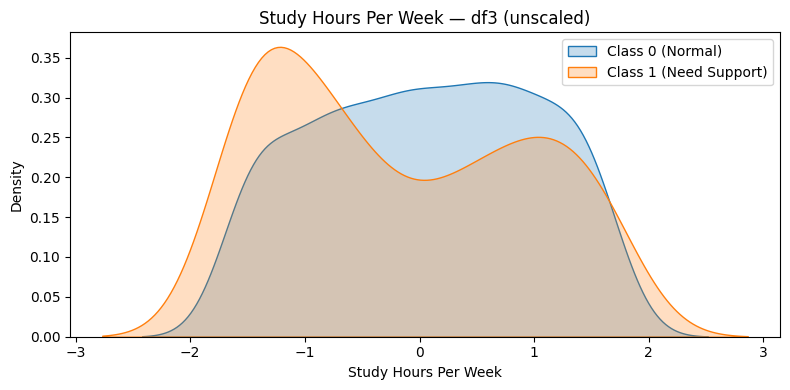

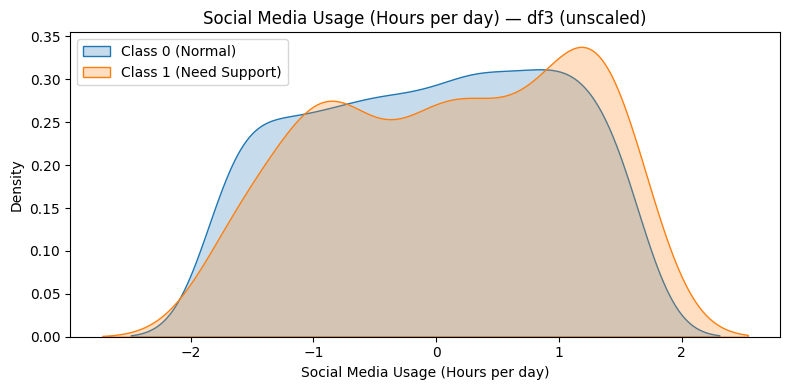

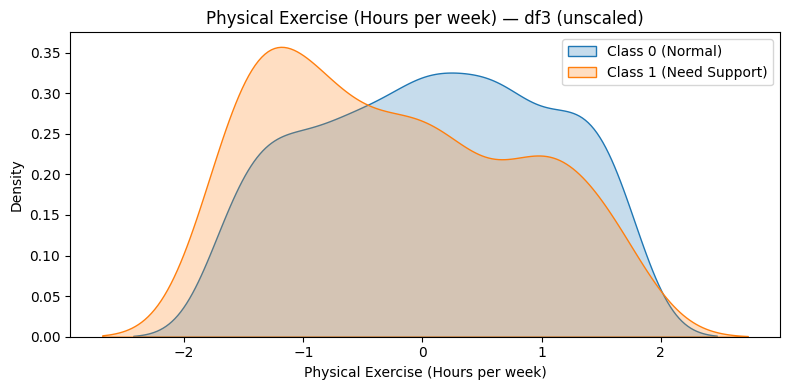

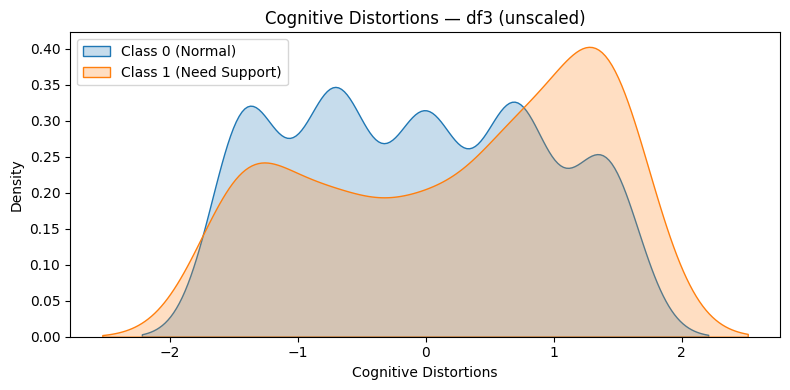

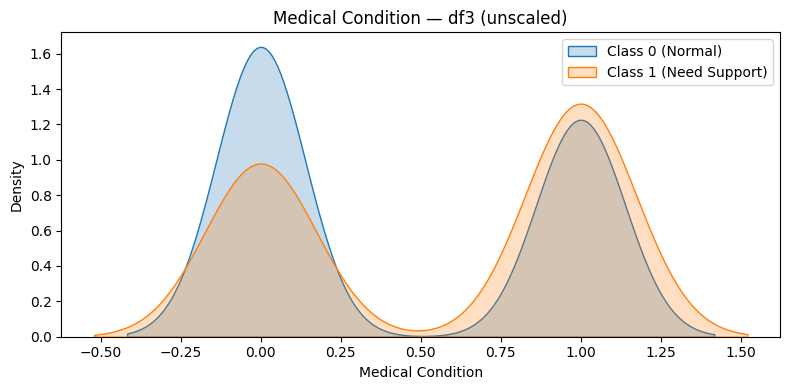

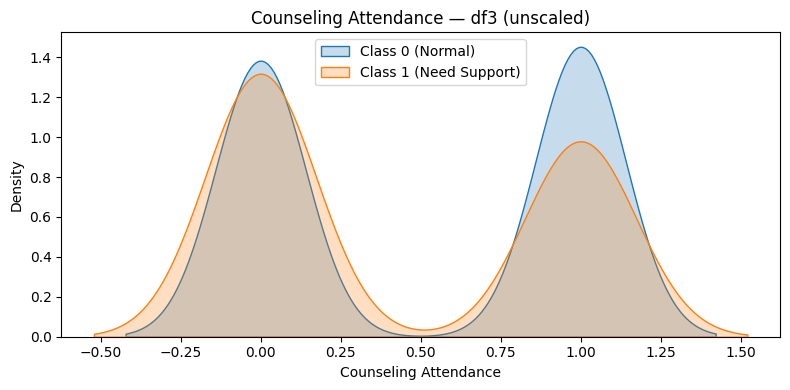

In [41]:
for col in ae_cols:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df.loc[df["Needs_Support_dir"]==0, col], label="Class 0 (Normal)", shade=True)
    sns.kdeplot(df.loc[df["Needs_Support_dir"]==1, col], label="Class 1 (Need Support)", shade=True)
    plt.title(f"{col} — df3 (unscaled)")
    plt.legend(); plt.tight_layout(); plt.show()

In [43]:
df2.sort_values("Risk_Score", ascending=False).head(10)

,Student ID,Age,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,...,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use,Risk_Score,Needs_Support,risk_cluster
710,830-78-6799,19,0,1,8,9,10,5,2,5,...,Yes,2,Travelling,5,Yes,Yes,5,1.746406,1,1
683,692-18-6999,30,0,1,6,9,9,4,4,4,...,Yes,5,Meditation,4,No,Yes,5,1.297577,1,1
740,745-98-9303,19,3,1,0,11,10,4,4,1,...,Yes,3,Reading,3,Yes,Yes,2,1.259870,1,1
21,861-60-5151,30,0,37,4,12,10,4,3,5,...,No,2,Watching Sports,5,Yes,No,1,1.226934,1,1
654,789-11-8047,29,1,47,3,12,1,2,2,4,...,No,1,Travelling,5,No,No,3,1.198943,1,1
685,255-13-7524,26,2,47,1,5,8,2,3,2,...,Yes,1,Walking or Nature Walks,5,Yes,No,1,1.188173,1,1
282,897-73-6775,29,3,60,1,4,9,1,5,4,...,Yes,5,Watching Sports,4,Yes,No,2,1.183409,1,1
660,652-68-2428,28,1,3,8,12,8,5,2,5,...,Yes,2,Exercise,2,Yes,No,5,1.162775,1,1
679,748-61-0034,21,0,56,0,10,10,5,5,1,...,Yes,5,Meditation,4,Yes,No,5,1.160581,1,1
759,862-68-5364,21,3,2,3,5,9,5,1,4,...,Yes,5,Reading,2,Yes,No,1,1.153155,1,1


In [44]:
# Existing relevant features for correlation
relevant_features_for_corr = [
    "Academic Performance (GPA)",
    "Study Hours Per Week",
    "Social Media Usage (Hours per day)",
    "Sleep Duration (Hours per night)",
    "Physical Exercise (Hours per week)",
    "Family Support  ",
    "Financial Stress",
    "Peer Pressure",
    "Mental Stress Level",
    "Diet Quality",
    "Cognitive Distortions"
]
# Add binary features that are now numeric after label encoding
binary_label_encoded_features = [
    "Counseling Attendance",
    "Family Mental Health History",
    "Medical Condition"
]
# Add one-hot encoded features (converting bool to int for correlation calculation)
one_hot_features_prefixes = ["Stress Coping Mechanisms_"]
one_hot_features = [col for col in df.columns if any(col.startswith(prefix) for prefix in one_hot_features_prefixes)]



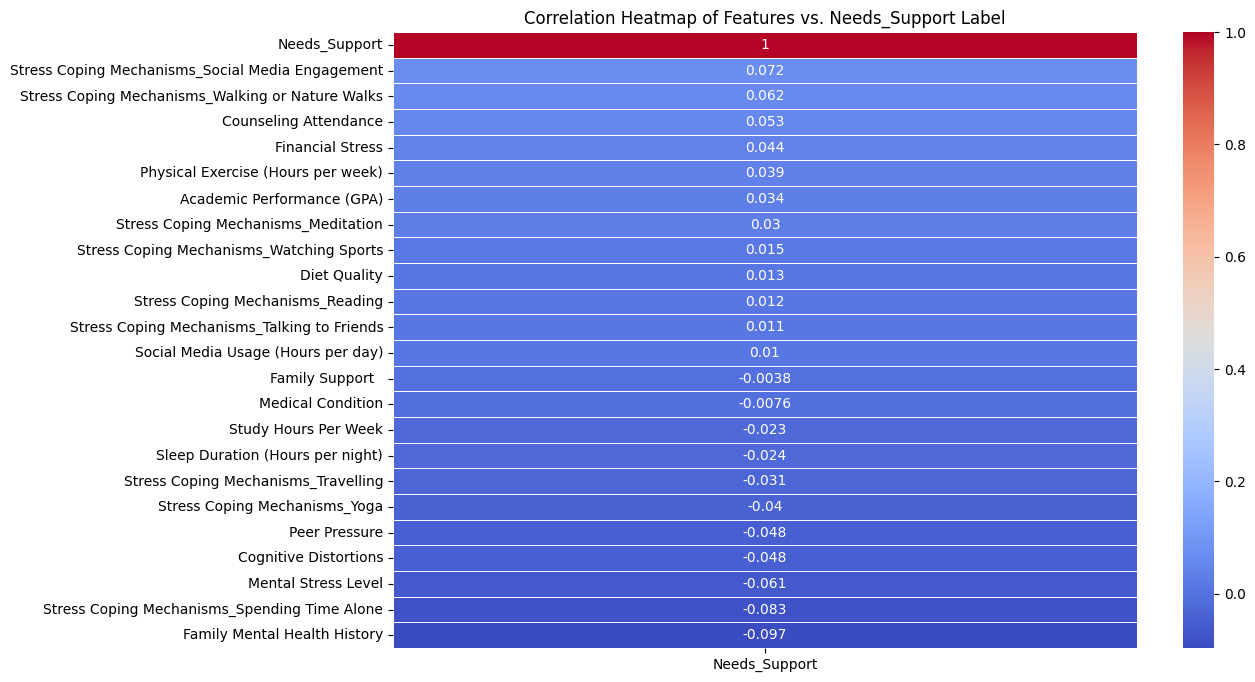

In [45]:
all_features_for_corr = relevant_features_for_corr + binary_label_encoded_features + one_hot_features

# Ensure all columns used for correlation are numeric (convert booleans to int)
temp_df_for_corr = df[all_features_for_corr + ["Needs_Support"]].copy()
for col in temp_df_for_corr.select_dtypes(include='bool').columns:
    temp_df_for_corr[col] = temp_df_for_corr[col].astype(int)

plt.figure(figsize=(12,8))
sns.heatmap(
    temp_df_for_corr.corr()[["Needs_Support"]].sort_values(by="Needs_Support", ascending=False),
    annot=True,
    cmap="coolwarm",
    linewidths=.5
)
plt.title("Correlation Heatmap of Features vs. Needs_Support Label")
plt.show()

In [48]:
df2.sort_values("Risk_Score", ascending=False).head(10)

,Student ID,Age,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,...,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use,Risk_Score,Needs_Support,risk_cluster
710,830-78-6799,19,0,1,8,9,10,5,2,5,...,Yes,2,Travelling,5,Yes,Yes,5,1.746406,1,1
683,692-18-6999,30,0,1,6,9,9,4,4,4,...,Yes,5,Meditation,4,No,Yes,5,1.297577,1,1
740,745-98-9303,19,3,1,0,11,10,4,4,1,...,Yes,3,Reading,3,Yes,Yes,2,1.259870,1,1
21,861-60-5151,30,0,37,4,12,10,4,3,5,...,No,2,Watching Sports,5,Yes,No,1,1.226934,1,1
654,789-11-8047,29,1,47,3,12,1,2,2,4,...,No,1,Travelling,5,No,No,3,1.198943,1,1
685,255-13-7524,26,2,47,1,5,8,2,3,2,...,Yes,1,Walking or Nature Walks,5,Yes,No,1,1.188173,1,1
282,897-73-6775,29,3,60,1,4,9,1,5,4,...,Yes,5,Watching Sports,4,Yes,No,2,1.183409,1,1
660,652-68-2428,28,1,3,8,12,8,5,2,5,...,Yes,2,Exercise,2,Yes,No,5,1.162775,1,1
679,748-61-0034,21,0,56,0,10,10,5,5,1,...,Yes,5,Meditation,4,Yes,No,5,1.160581,1,1
759,862-68-5364,21,3,2,3,5,9,5,1,4,...,Yes,5,Reading,2,Yes,No,1,1.153155,1,1


In [49]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.25, random_state=0)
df["IF_label"] = (iso.fit_predict(df[core_features]) == -1).astype(int)
pd.crosstab(df["Needs_Support"], df["IF_label"])

IF_label,0,1
Needs_Support,,
0,490,80
1,80,110


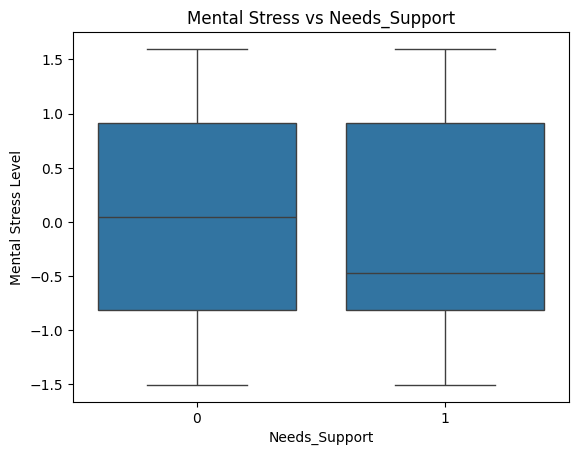

In [57]:
sns.boxplot(x=df["Needs_Support"], y=df["Mental Stress Level"])
plt.title("Mental Stress vs Needs_Support")
plt.show()

#validating the labels learnability with ML model

In [50]:

X = df.drop(["Risk_Score", "Needs_Support"], axis=1)
y = df["Needs_Support"]

# Identify and drop non-numeric/object columns that XGBoost cannot handle by default.
# 'Student ID' and 'Gender' are specifically mentioned in the error output.
# 'Age' was previously part of useless_columns but was also part of numeric_cols, so it should be scaled.
# 'Substance Use' and 'Relationship Stress' should also be dropped if they exist as objects.
# We'll explicitly remove them to ensure clean input.
rows_to_drop = ['Student ID', 'Gender', 'Substance Use', 'Relationship Stress']
X = X.drop(columns=[col for col in rows_to_drop if col in X.columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scale = float(np.sum(y_train == 0) / np.sum(y_train == 1))

model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=6,
    min_child_weight=1,
    subsample=0.6,
    colsample_bytree=0.6,
    reg_lambda=1.0,
    reg_alpha=0.01,
    gamma=0.1,
    scale_pos_weight=scale,   # handle imbalance
    eval_metric="aucpr",
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92       143
           1       0.79      0.66      0.72        47

    accuracy                           0.87       190
   macro avg       0.84      0.80      0.82       190
weighted avg       0.87      0.87      0.87       190


Confusion Matrix:
 [[135   8]
 [ 16  31]]


In [51]:
probs = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, probs)
f1 = 2 * (precision * recall) / (precision + recall + 1e-9)

best_index = int(np.argmax(f1))
best_threshold = thresholds[best_index] if best_index < len(thresholds) else 0.5

print("Best Threshold:", best_threshold)
print("Precision:", float(precision[best_index]))
print("Recall:", float(recall[best_index]))
print("F1:", float(f1[best_index]))

THRESHOLD = float(best_threshold)

probs_train = model.predict_proba(X_train)[:, 1]
probs_test  = model.predict_proba(X_test)[:, 1]

y_train_pred = (probs_train >= THRESHOLD).astype(int)
y_test_pred  = (probs_test  >= THRESHOLD).astype(int)


Best Threshold: 0.5239682
Precision: 0.8378378378378378
Recall: 0.6595744680851063
F1: 0.7380952376023243


In [52]:
def print_support_model_results(y_train, y_train_pred, y_train_proba,
                                y_test, y_test_pred, y_test_proba,
                                model_name="Support Model"):

    print(f"\n=== {model_name.upper()} RESULTS ===")

 # Ensure probabilities are for class 1
    if len(np.shape(y_train_proba)) > 1:
        y_train_proba = y_train_proba[:, 1]
    if len(np.shape(y_test_proba)) > 1:
        y_test_proba = y_test_proba[:, 1]

    print("\n[TRAIN RESULTS]")
    print(classification_report(y_train, y_train_pred, digits=4))
    try:
        print("ROC AUC (train):", round(roc_auc_score(y_train, y_train_proba), 4))
    except:
        print("ROC AUC (train): Not applicable")

    print("\n[TEST RESULTS]")
    print(classification_report(y_test, y_test_pred, digits=4))
    try:
        print("ROC AUC (test):", round(roc_auc_score(y_test, y_test_proba), 4))
    except:
        print("ROC AUC (test): Not applicable")


In [53]:
def print_support_model_results(y_train, y_train_pred, y_train_proba,
                                y_test, y_test_pred, y_test_proba,
                                model_name="Support Model"):

    print(f"\n=== {model_name.upper()} RESULTS ===")

 # Ensure probabilities are for class 1
    if len(np.shape(y_train_proba)) > 1:
        y_train_proba = y_train_proba[:, 1]
    if len(np.shape(y_test_proba)) > 1:
        y_test_proba = y_test_proba[:, 1]

    print("\n[TRAIN RESULTS]")
    print(classification_report(y_train, y_train_pred, digits=4))
    try:
        print("ROC AUC (train):", round(roc_auc_score(y_train, y_train_proba), 4))
    except:
        print("ROC AUC (train): Not applicable")

    print("\n[TEST RESULTS]")
    print(classification_report(y_test, y_test_pred, digits=4))
    try:
        print("ROC AUC (test):", round(roc_auc_score(y_test, y_test_proba), 4))
    except:
        print("ROC AUC (test): Not applicable")


In [54]:
# Show the optimized-threshold results neatly
print_support_model_results(
    y_train, y_train_pred, probs_train,
    y_test,  y_test_pred,  probs_test,
    model_name="Support Model (Threshold Optimized)"
)


=== SUPPORT MODEL (THRESHOLD OPTIMIZED) RESULTS ===

[TRAIN RESULTS]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       427
           1     1.0000    1.0000    1.0000       143

    accuracy                         1.0000       570
   macro avg     1.0000    1.0000    1.0000       570
weighted avg     1.0000    1.0000    1.0000       570

ROC AUC (train): 1.0

[TEST RESULTS]
              precision    recall  f1-score   support

           0     0.8954    0.9580    0.9257       143
           1     0.8378    0.6596    0.7381        47

    accuracy                         0.8842       190
   macro avg     0.8666    0.8088    0.8319       190
weighted avg     0.8812    0.8842    0.8793       190

ROC AUC (test): 0.9201


In [55]:
def get_feature_importance(model, feature_names, top_n=None):
    if hasattr(model, "coef_"):
        importance = np.mean(np.abs(model.coef_), axis=0)
    elif hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    else:
        raise ValueError("This model type does not support feature importance.")

    fi = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False)

    if top_n:
        fi = fi.head(top_n)

    return fi.reset_index(drop=True)

fi = get_feature_importance(model, X_train.columns)
fi.head(15)


,Feature,Importance
0,IF_label,0.112871
1,Needs_Support_dir,0.104129
2,Risk_Score_dir,0.072796
3,Stress Coping Mechanisms_Spending Time Alone,0.043290
4,Stress Coping Mechanisms_Meditation,0.038708
5,Peer Pressure,0.036910
6,Sleep Duration (Hours per night),0.036809
7,Study Hours Per Week,0.034247
8,Stress Coping Mechanisms_Yoga,0.033880
9,Counseling Attendance,0.033597


#Using CTGAN for XGboost minority class

In [63]:
!pip install sdv

  Using cached sdv-1.30.0-py3-none-any.whl.metadata (14 kB)
  Using cached boto3-1.42.4-py3-none-any.whl.metadata (6.8 kB)
  Using cached botocore-1.42.4-py3-none-any.whl.metadata (5.9 kB)
  Using cached copulas-0.12.3-py3-none-any.whl.metadata (9.5 kB)
  Using cached ctgan-0.11.1-py3-none-any.whl.metadata (10 kB)
  Using cached deepecho-0.7.0-py3-none-any.whl.metadata (10 kB)
  Using cached rdt-1.18.2-py3-none-any.whl.metadata (10 kB)
  Using cached sdmetrics-0.24.0-py3-none-any.whl.metadata (9.3 kB)
  Using cached s3transfer-0.16.0-py3-none-any.whl.metadata (1.7 kB)
Using cached sdv-1.30.0-py3-none-any.whl (197 kB)
Using cached boto3-1.42.4-py3-none-any.whl (140 kB)
Using cached botocore-1.42.4-py3-none-any.whl (14.5 MB)
Using cached copulas-0.12.3-py3-none-any.whl (52 kB)
Using cached ctgan-0.11.1-py3-none-any.whl (25 kB)
Using cached deepecho-0.7.0-py3-none-any.whl (27 kB)
Using cached rdt-1.18.2-py3-none-any.whl (74 kB)
Using cached sdmetrics-0.24.0-py3-none-any.whl (198 kB)
Using

In [67]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

minority_df = df[df["Needs_Support"] == 1].copy()

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(minority_df)

ctgan = CTGANSynthesizer(
    metadata=metadata,
    epochs=800,
    enforce_rounding=True
)
ctgan.fit(minority_df)

# generate as many synthetics as needed
n_minority = len(minority_df)
synthetic_minority = ctgan.sample(num_rows=n_minority)

print("Synthetic minority shape:", synthetic_minority.shape)


Synthetic minority shape: (190, 29)


In [68]:
df_ctgan = pd.concat([df, synthetic_minority], ignore_index=True)

X_ctgan = df_ctgan.drop(["Risk_Score", "Needs_Support"], axis=1)
y_ctgan = df_ctgan["Needs_Support"].astype(int)

print("Balanced distribution (after CTGAN):")
print(y_ctgan.value_counts())


Balanced distribution (after CTGAN):
Needs_Support
0    570
1    380
Name: count, dtype: int64


In [69]:
from sklearn.model_selection import train_test_split

# Real dataset = baseline
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# CTGAN dataset (train only)
X_train_ctgan, _, y_train_ctgan, _ = train_test_split(
    X_ctgan, y_ctgan, test_size=0.25, random_state=42, stratify=y_ctgan
)



In [70]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd # Ensure pandas is imported

def train_xgb(X_train, y_train, X_test, y_test, name=""):
    model = XGBClassifier(
        n_estimators=500,
        learning_rate=0.03,
        max_depth=6,
        subsample=0.7,
        colsample_bytree=0.7,
        eval_metric="logloss",
        random_state=42
    )

    # Identify categorical columns (object type)
    categorical_cols_train = X_train.select_dtypes(include=['object']).columns
    categorical_cols_test = X_test.select_dtypes(include=['object']).columns

    # One-hot encode categorical features
    X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols_train, drop_first=True)
    X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols_test, drop_first=True)

    # Align columns between train and test to handle potential differences in categories
    # (e.g., a category present in train but not in test, or vice-versa)
    train_cols = set(X_train_encoded.columns)
    test_cols = set(X_test_encoded.columns)

    missing_in_test = list(train_cols - test_cols)
    for c in missing_in_test:
        X_test_encoded[c] = 0

    missing_in_train = list(test_cols - train_cols)
    for c in missing_in_train:
        X_train_encoded[c] = 0

    # Ensure the order of columns is the same
    X_test_encoded = X_test_encoded[X_train_encoded.columns]

    model.fit(X_train_encoded, y_train)

    y_pred = model.predict(X_test_encoded)
    y_proba = model.predict_proba(X_test_encoded)[:,1]

    print(f"\n======== {name} ========")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_proba))
    print(classification_report(y_test, y_pred))

    return model

# Baseline (real only)
model_real = train_xgb(X_train_real, y_train_real, X_test_real, y_test_real, "Real-Only XGBoost")

# CTGAN-balanced
model_ctgan = train_xgb(X_train_ctgan, y_train_ctgan, X_test_real, y_test_real, "CTGAN-Balanced XGBoost")


======== Real-Only XGBoost ========
Accuracy: 0.8578947368421053
AUC: 0.9178693646778754
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       143
           1       0.81      0.55      0.66        47

    accuracy                           0.86       190
   macro avg       0.84      0.76      0.78       190
weighted avg       0.85      0.86      0.85       190


======== CTGAN-Balanced XGBoost ========
Accuracy: 0.9105263157894737
AUC: 0.9468829043297128
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       143
           1       0.84      0.79      0.81        47

    accuracy                           0.91       190
   macro avg       0.89      0.87      0.88       190
weighted avg       0.91      0.91      0.91       190



error analysis

In [65]:
need_support_df = df2[df2["Needs_Support"] == 1]

print("Number of students labeled as Need Support:", len(need_support_df))
need_support_df

Number of students labeled as Need Support: 190


,Student ID,Age,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,...,Counseling Attendance,Diet Quality,Stress Coping Mechanisms,Cognitive Distortions,Family Mental Health History,Medical Condition,Substance Use,Risk_Score,Needs_Support,risk_cluster
1,871-12-8572,25,0,28,0,6,0,1,1,1,...,Yes,3,Meditation,2,Yes,No,1,0.744449,1,1
2,495-13-2672,24,0,45,3,12,10,3,3,1,...,Yes,5,Reading,1,Yes,Yes,3,0.896245,1,1
3,365-77-2496,20,2,8,7,7,4,1,3,2,...,No,1,Social Media Engagement,2,Yes,No,4,0.625071,1,1
7,193-03-0467,25,3,12,0,4,5,5,5,1,...,No,1,Meditation,5,No,Yes,3,0.926474,1,1
9,504-53-5581,21,3,4,1,4,8,2,4,1,...,Yes,4,Talking to Friends,5,Yes,Yes,3,0.984148,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,527-24-3188,30,1,36,0,10,10,5,4,5,...,Yes,4,Yoga,1,No,No,1,0.695962,1,1
754,836-77-4994,19,4,7,6,7,8,2,1,1,...,Yes,2,Travelling,1,No,No,4,0.771920,1,1
755,826-89-7993,24,2,50,4,11,8,5,2,4,...,Yes,1,Exercise,3,Yes,No,2,0.668783,1,1
756,681-15-6754,23,3,5,6,12,7,1,4,2,...,Yes,2,Meditation,4,Yes,No,1,0.631048,1,1


#generating anomaly pattren Data

In [97]:
df4=df_unscaled.copy()

In [98]:
def preprocess_student(student_dict):

    # Convert to DataFrame
    df4 = pd.DataFrame([student_dict])

    # Ensure every column exists
    for col in numeric_cols:
        if col not in df4.columns:
            df4[col] = 0  # safe fallback

    # Keep correct AE order
    df4 = df4[numeric_cols]

    # Scale using trained scaler
    X = scaler.transform(df4.values)

    return X


In [99]:
def predict_student(student_dict):

    X = preprocess_student(student_dict)
    recon = auto.predict(X, verbose=0)
    risk = ((X - recon)**2).mean(axis=1)[0]

    label = 1 if risk >= thr else 0

    return risk, label


In [100]:
drop_cols = ['Age','Student ID','Substance Use','Relationship Stress','Gender']
df4 = df4.drop(columns=[c for c in drop_cols if c in df4.columns])


In [101]:
binary_cols = [
    resolve_col(df,'Counseling Attendance'),
    resolve_col(df,'Family Mental Health History'),
    resolve_col(df,'Medical Condition')
]

numeric_cols = [
    resolve_col(df,'Study Hours Per Week'),
    resolve_col(df,'Social Media Usage (Hours per day)'),
    resolve_col(df,'Sleep Duration (Hours per night)'),
    resolve_col(df,'Physical Exercise (Hours per week)'),
    resolve_col(df,'Family Support  '),
    resolve_col(df,'Financial Stress'),
    resolve_col(df,'Peer Pressure'),
    resolve_col(df,'Mental Stress Level'),
    resolve_col(df,'Diet Quality'),
    resolve_col(df,'Cognitive Distortions')
]


In [102]:
import json

preprocess_info = {
    "numeric_cols": numeric_cols,
    "binary_cols": binary_cols,
    "drop_cols": drop_cols
}

with open("preprocess_info.json", "w") as f:
    json.dump(preprocess_info, f)

print("Preprocessing info saved.")


Preprocessing info saved.


In [103]:
# ============================================================
# 5) BINARY ENCODING
# ============================================================
le = LabelEncoder()
for col in binary_cols:
    df4[col] = le.fit_transform(df4[col].astype(str))


In [104]:
# ============================================================
# 6) OPTIONAL ONE-HOT ENCODING (Coping Strategies)
# ============================================================
coping = difflib.get_close_matches("Stress Coping Mechanisms", df4.columns, n=1, cutoff=0.4)
if coping:
    df4 = pd.get_dummies(df4, columns=[coping[0]], drop_first=True)

df_real = df4.copy()   # backup before scaling
df_real.head()


,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Mental Stress Level,Counseling Attendance,...,Medical Condition,Stress Coping Mechanisms_Meditation,Stress Coping Mechanisms_Reading,Stress Coping Mechanisms_Social Media Engagement,Stress Coping Mechanisms_Spending Time Alone,Stress Coping Mechanisms_Talking to Friends,Stress Coping Mechanisms_Travelling,Stress Coping Mechanisms_Walking or Nature Walks,Stress Coping Mechanisms_Watching Sports,Stress Coping Mechanisms_Yoga
0,2,9,2,12,2,1,1,3,9,0,...,1,False,False,False,False,False,False,True,False,False
1,0,28,0,6,0,1,1,1,9,1,...,0,True,False,False,False,False,False,False,False,False
2,0,45,3,12,10,3,3,1,9,1,...,1,False,True,False,False,False,False,False,False,False
3,2,8,7,7,4,1,3,2,1,0,...,0,False,False,True,False,False,False,False,False,False
4,0,14,6,8,1,2,4,4,7,1,...,0,False,False,False,False,False,False,False,False,False


In [105]:
# ============================================================
# FIXED SYNTHETIC ANOMALY GENERATOR — ONLY HARMFUL PATTERNS
# ============================================================

def generate_harmful_students(n=600):

    syn = pd.DataFrame()

    # Psychological Harmful Patterns
    syn["Mental Stress Level"] = np.random.normal(4.6, 0.3, n).clip(3.5, 5)
    syn["Cognitive Distortions"] = np.random.normal(4.3, 0.4, n).clip(3, 5)
    syn["Peer Pressure"] = np.random.normal(4.1, 0.5, n).clip(3, 5)

    # Behavioral Harmful Patterns
    syn["Social Media Usage (Hours per day)"] = np.random.normal(6, 1.5, n).clip(3, 12)
    syn["Financial Stress"] = np.random.normal(4.3, 0.4, n).clip(3.5, 5)

    # Low protective factors (harmful when low)
    syn["Family Support  "] = np.random.normal(1.7, 0.6, n).clip(1, 3)
    syn["Diet Quality"] = np.random.normal(2.0, 0.7, n).clip(1, 3)
    syn["Physical Exercise (Hours per week)"] = np.random.normal(0.8, 0.5, n).clip(0, 2)

    # Sleep — harmful when low
    syn["Sleep Duration (Hours per night)"] = np.random.normal(4.0, 1.0, n).clip(1, 6)

    # Study hours — harmful when too low or too inconsistent
    syn["Study Hours Per Week"] = np.random.normal(10, 6, n).clip(0, 25)

    # Medical/attendance risk factors
    syn["Medical Condition"] = np.random.binomial(1, 0.5, n)
    syn["Counseling Attendance"] = np.random.binomial(1, 0.15, n)

    return syn

# generate corrected synthetic anomalies
synthetic_df = generate_harmful_students(600)
synthetic_df.head()


,Mental Stress Level,Cognitive Distortions,Peer Pressure,Social Media Usage (Hours per day),Financial Stress,Family Support,Diet Quality,Physical Exercise (Hours per week),Sleep Duration (Hours per night),Study Hours Per Week,Medical Condition,Counseling Attendance
0,4.365068,4.154880,4.049388,4.304832,4.590895,1.446038,3.000000,1.323713,2.882136,0.000000,0,0
1,4.457979,3.730286,3.998600,3.707109,4.118563,2.540718,1.915035,0.928701,3.173810,3.277408,1,0
2,4.341679,4.382037,4.655289,7.760312,3.761513,2.096149,2.657275,0.852105,2.307503,12.071228,1,0
3,5.000000,4.313644,5.000000,6.834309,4.840602,1.280263,1.336596,0.000000,3.638042,9.125193,0,0
4,4.724446,3.578098,3.927572,7.516355,3.568893,1.709028,1.568500,0.726928,4.263045,13.143282,1,0


In [106]:
# ============================================================
# 8) SCALE REAL ONLY
# ============================================================
scaler = StandardScaler().fit(df_real[numeric_cols])
real_scaled = scaler.transform(df_real[numeric_cols])

# Ensure column names in synthetic_df match numeric_cols for scaling
# The generate_true_anomalies function creates 'Family Support',
# but numeric_cols contains 'Family Support  ' due to resolve_col function.
if 'Family Support' in synthetic_df.columns and 'Family Support  ' in numeric_cols:
    synthetic_df.rename(columns={'Family Support': 'Family Support  '}, inplace=True)

# scale synthetic in its own space
syn_scaler = StandardScaler().fit(synthetic_df[numeric_cols])
syn_scaled = syn_scaler.transform(synthetic_df[numeric_cols])

# amplify abnormality
syn_scaled *= 1.8

# align synthetic back into real statistical space
syn_aligned = syn_scaled * real_scaled.std(axis=0) + real_scaled.mean(axis=0)

In [107]:
# ============================================================
# 9) AUTOENCODER ARCHITECTURE
# ============================================================
dim = real_scaled.shape[1]

inp = Input(shape=(dim,))
x = Dense(32, activation='relu')(inp)
x = Dropout(0.1)(x)
x = Dense(16, activation='relu')(x)
bottleneck = Dense(4, activation='relu')(x)
x = Dense(16, activation='relu')(bottleneck)
x = Dense(32, activation='relu')(x)
out = Dense(dim, activation='linear')(x)

auto = Model(inp, out)
auto.compile(optimizer=Adam(0.001), loss='mse')

history = auto.fit(
    real_scaled, real_scaled,
    epochs=120,
    batch_size=16,
    validation_split=0.1,
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1
)


Epoch 1/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.9897 - val_loss: 0.9669
Epoch 2/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9404 - val_loss: 0.9053
Epoch 3/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8700 - val_loss: 0.8448
Epoch 4/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.8091 - val_loss: 0.7970
Epoch 5/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7579 - val_loss: 0.7491
Epoch 6/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.7107 - val_loss: 0.7014
Epoch 7/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6747 - val_loss: 0.6703
Epoch 8/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6508 - val_loss: 0.6561
Epoch 9/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6333 - val_loss: 0.6453
Epoch 10/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6226 - val_loss: 0.6359
Epoch 11/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6137 - val_loss: 0.6308
Epoch 12/120
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - los

In [108]:
# ============================================================
# 10) COMPUTE ERRORS
# ============================================================
real_recon = auto.predict(real_scaled)
real_error = ((real_scaled - real_recon)**2).mean(axis=1)

syn_recon = auto.predict(syn_aligned)
syn_error = ((syn_aligned - syn_recon)**2).mean(axis=1)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [109]:
# ============================================================
# 12) THRESHOLD
# ============================================================
threshold = np.percentile(real_error, 75)

df_real["Risk_Score"] = real_error
df_real["Needs_Support"] = (real_error >= threshold).astype(int)

df_real.head()


,Academic Performance (GPA),Study Hours Per Week,Social Media Usage (Hours per day),Sleep Duration (Hours per night),Physical Exercise (Hours per week),Family Support,Financial Stress,Peer Pressure,Mental Stress Level,Counseling Attendance,...,Stress Coping Mechanisms_Reading,Stress Coping Mechanisms_Social Media Engagement,Stress Coping Mechanisms_Spending Time Alone,Stress Coping Mechanisms_Talking to Friends,Stress Coping Mechanisms_Travelling,Stress Coping Mechanisms_Walking or Nature Walks,Stress Coping Mechanisms_Watching Sports,Stress Coping Mechanisms_Yoga,Risk_Score,Needs_Support
0,2,9,2,12,2,1,1,3,9,0,...,False,False,False,False,False,True,False,False,0.161201,0
1,0,28,0,6,0,1,1,1,9,1,...,False,False,False,False,False,False,False,False,0.126603,0
2,0,45,3,12,10,3,3,1,9,1,...,True,False,False,False,False,False,False,False,0.500725,0
3,2,8,7,7,4,1,3,2,1,0,...,False,True,False,False,False,False,False,False,0.708804,1
4,0,14,6,8,1,2,4,4,7,1,...,False,False,False,False,False,False,False,False,0.865754,1


In [110]:
import joblib
import tensorflow as tf

# Save AE model
auto.save("autoencoder_model.h5")

# Save scaler
joblib.dump(scaler, "scaler.pkl")

print("Model + scaler saved.")


Model + scaler saved.


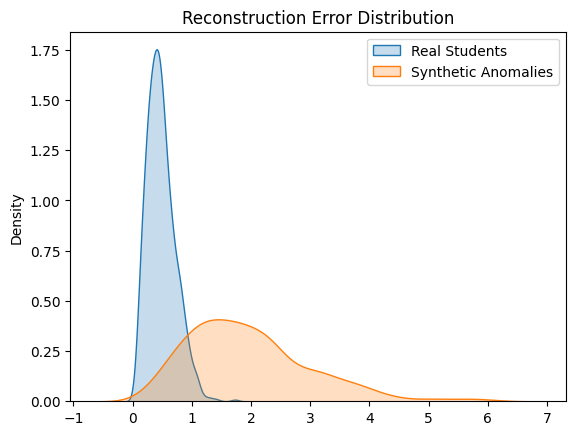

In [111]:
# ============================================================
# 11) KDE PLOT
# ============================================================
sns.kdeplot(real_error, fill=True, label="Real Students")
sns.kdeplot(syn_error, fill=True, label="Synthetic Anomalies")
plt.title("Reconstruction Error Distribution")
plt.legend()
plt.show()


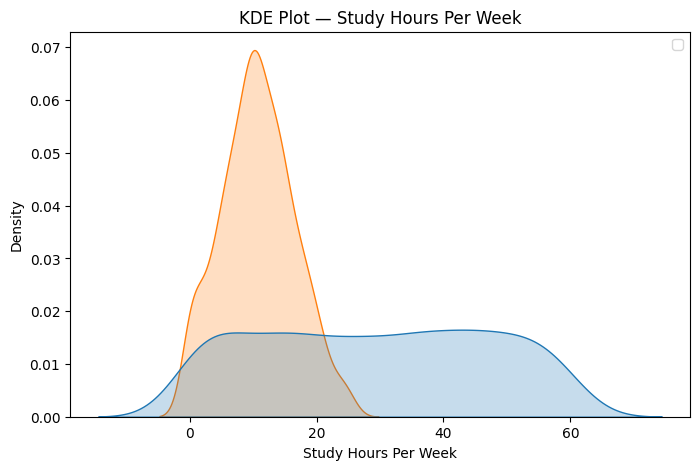

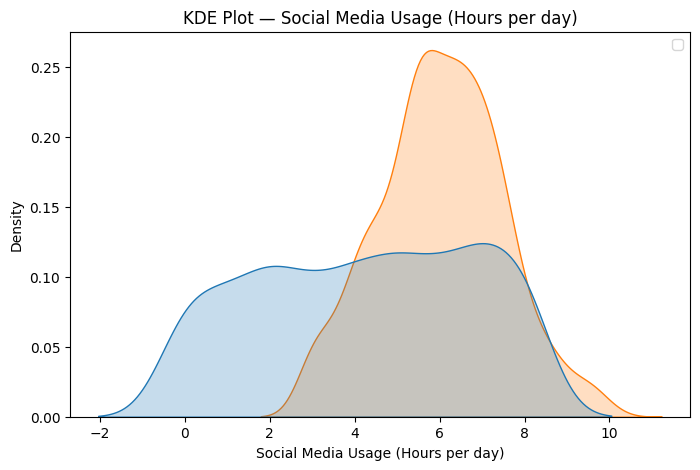

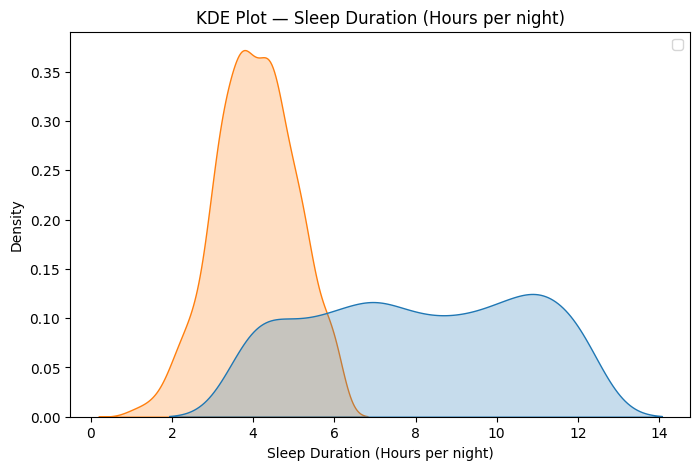

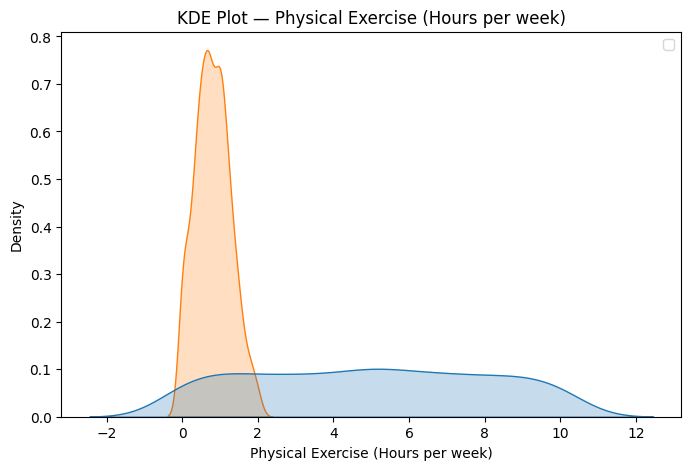

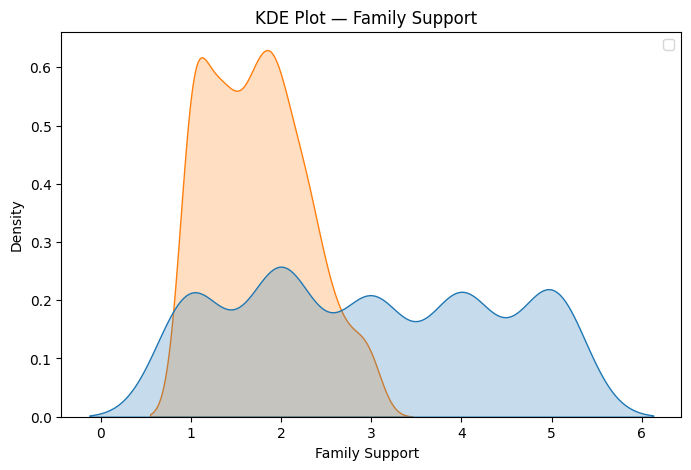

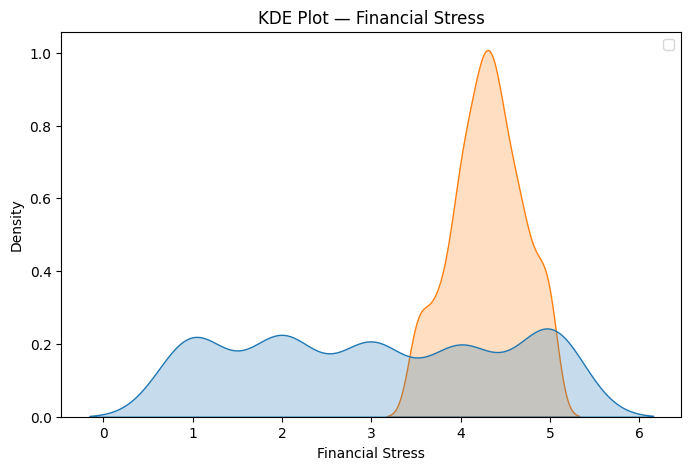

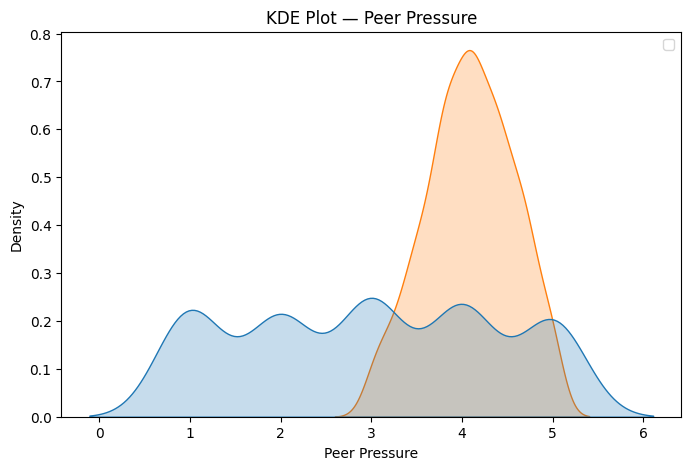

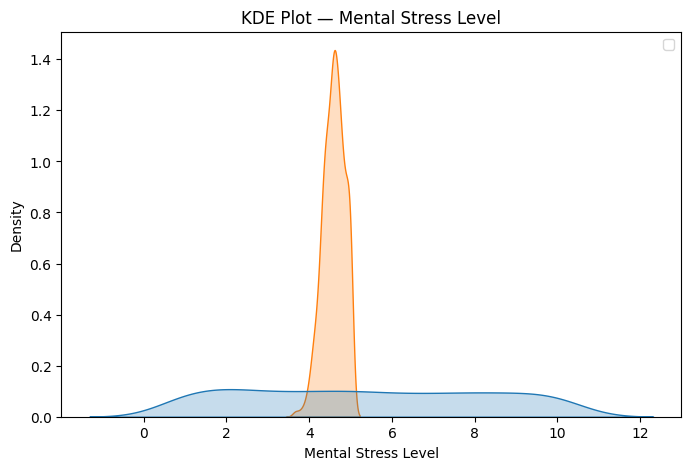

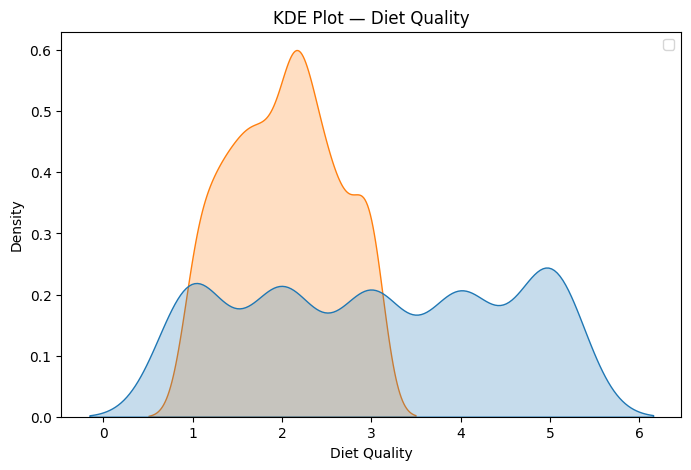

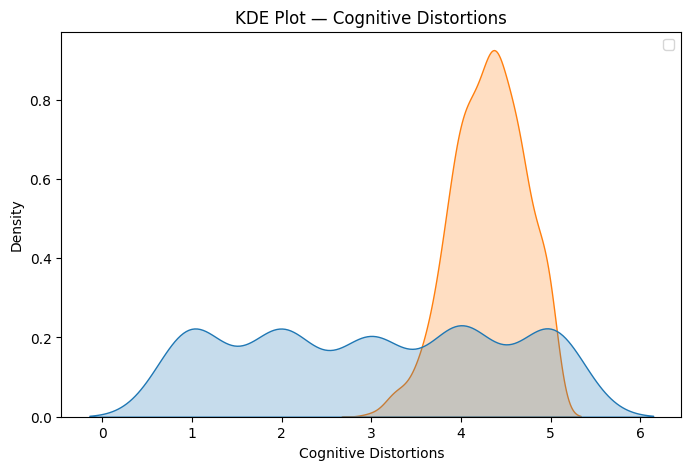

In [112]:
# ============================================================
# KDE PLOTS FOR ALL FEATURES — Real vs Synthetic
# ============================================================

# Combine real + synthetic into one DataFrame (unscaled values)
real_temp = df_real[numeric_cols].copy()
syn_temp = synthetic_df[numeric_cols].copy()

# Set labels for plotting
real_temp["__label__"] = "Real"
syn_temp["__label__"] = "Synthetic"

combined = pd.concat([real_temp, syn_temp], axis=0)

# Plot KDE for each numeric feature
for col in numeric_cols:

    plt.figure(figsize=(8, 5))
    sns.kdeplot(
        data=combined,
        x=col,
        hue="__label__",
        fill=True,
        common_norm=False
    )

    plt.title(f"KDE Plot — {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.show()


In [113]:
# ============ 10A) Compute raw residuals (REAL + SYN) ============
R_real = real_scaled - real_recon
R_syn  = syn_aligned - syn_recon


In [114]:
# ============ 10B) Apply directional masking ONLY to synthetic data ============

ae_cols = numeric_cols # Autoencoder features are the numeric columns

# Define direction vector for each feature in ae_cols:
# +1: harmful when high
# -1: harmful when low
# 0: neutral/not applicable (not used in this specific scenario based on synthetic data generation)
dir_vec = [
    -1, # 'Study Hours Per Week' - harmful when low
    +1, # 'Social Media Usage (Hours per day)' - harmful when high
    -1, # 'Sleep Duration (Hours per night)' - harmful when low
    -1, # 'Physical Exercise (Hours per week)' - harmful when low
    -1, # 'Family Support  ' - harmful when low
    +1, # 'Financial Stress' - harmful when high
    +1, # 'Peer Pressure' - harmful when high
    +1, # 'Mental Stress Level' - harmful when high
    -1, # 'Diet Quality' - harmful when low
    +1  # 'Cognitive Distortions' - harmful when high
]

R_syn_dir = np.zeros_like(R_syn)

for j, col in enumerate(ae_cols):
    d = dir_vec[j]  # +1 harmful high, -1 harmful low, 0 neutral

    if d == +1:
        R_syn_dir[:, j] = np.maximum(R_syn[:, j], 0)
    elif d == -1:
        R_syn_dir[:, j] = np.minimum(R_syn[:, j], 0)
    else:
        R_syn_dir[:, j] = R_syn[:, j]


In [115]:
# ============ 10C) Compute risks for REAL and SYN (different logic) ============

# REAL students → use symmetric reconstruction error (no masking)
risk_real = (R_real**2).mean(axis=1)

# SYNTHETIC anomalies → directional risk (only harmful directions counted)
risk_syn = (R_syn_dir**2).mean(axis=1)

df_real["Directional_Risk"] = risk_real


In [116]:
thr = np.percentile(risk_real, 75)
df_real["Needs_Support"] = (risk_real >= thr).astype(int)


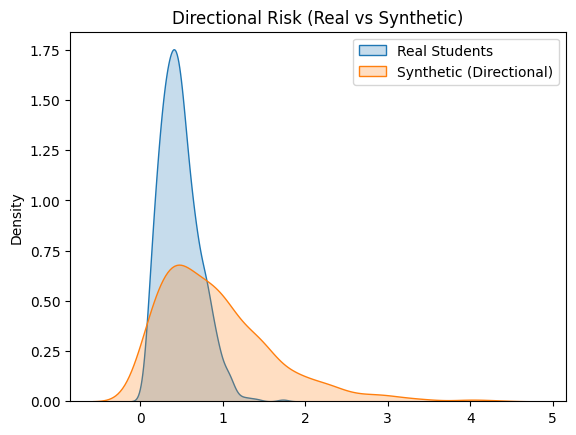

In [117]:
sns.kdeplot(risk_real, fill=True, label="Real Students")
sns.kdeplot(risk_syn,  fill=True, label="Synthetic (Directional)")
plt.legend()
plt.title("Directional Risk (Real vs Synthetic)")
plt.show()


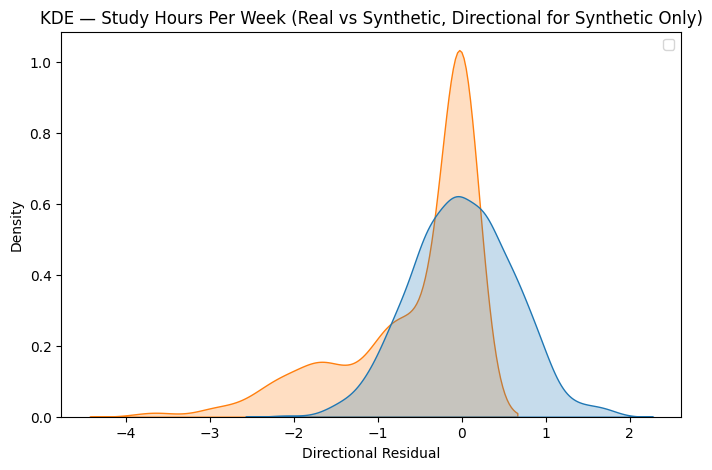

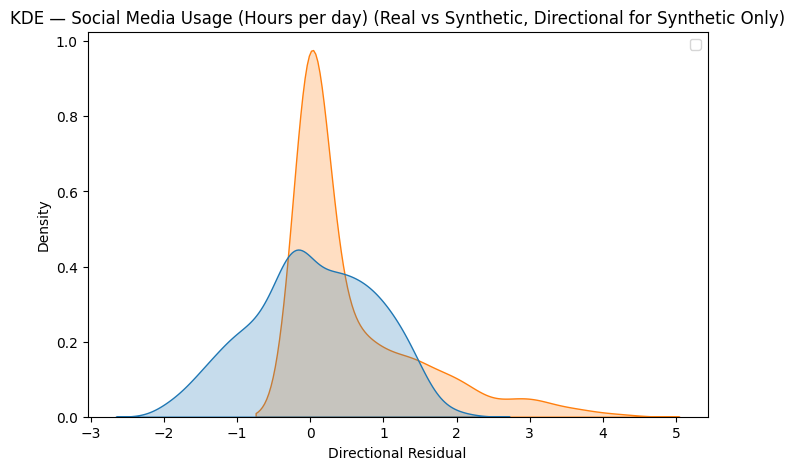

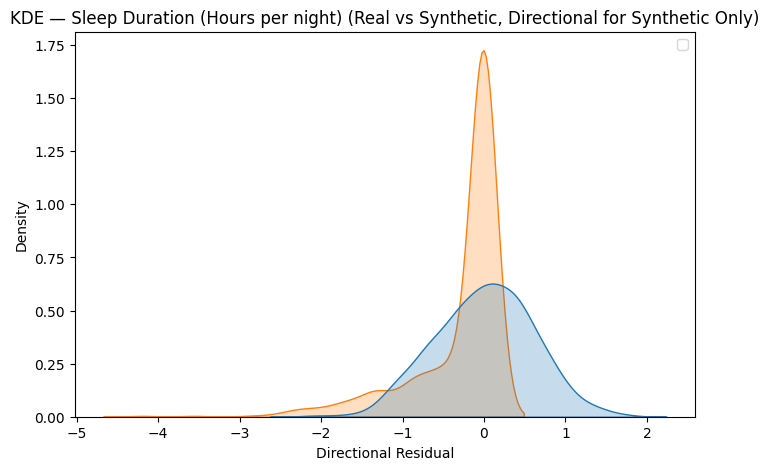

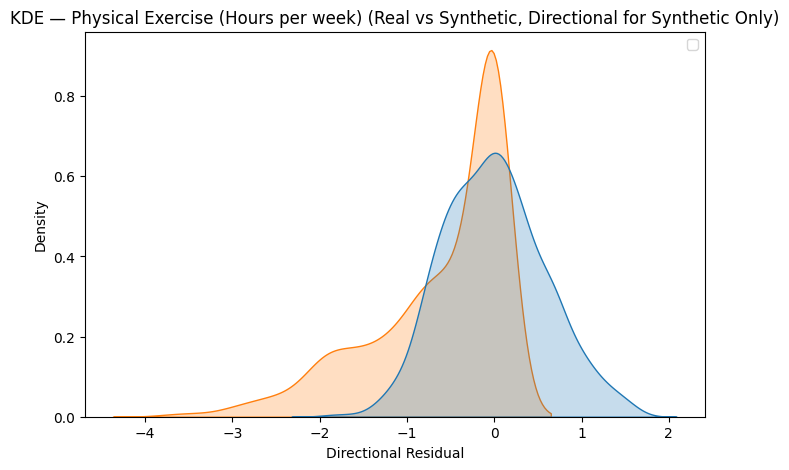

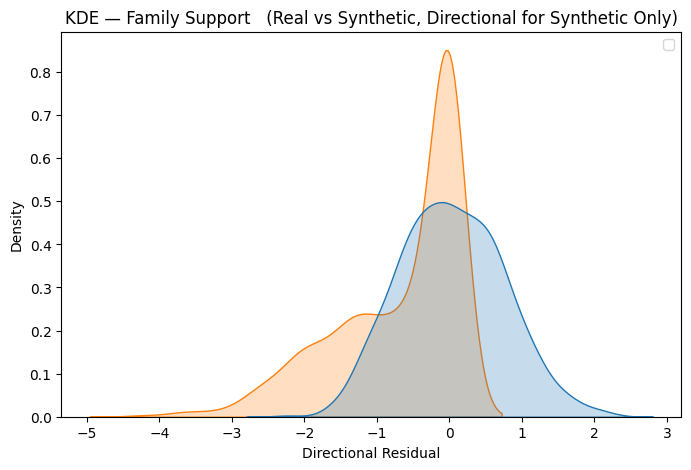

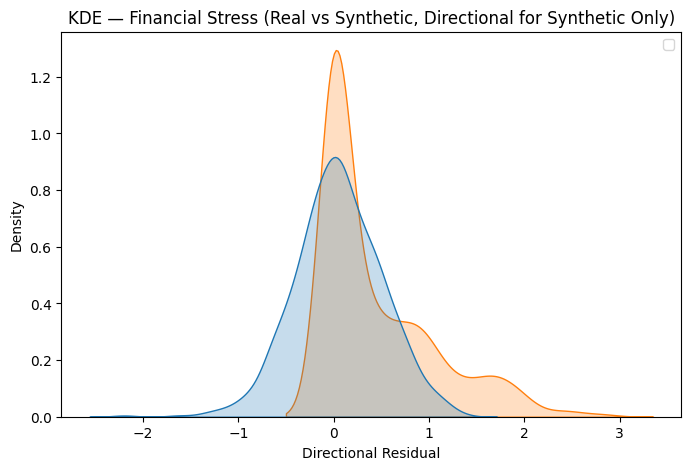

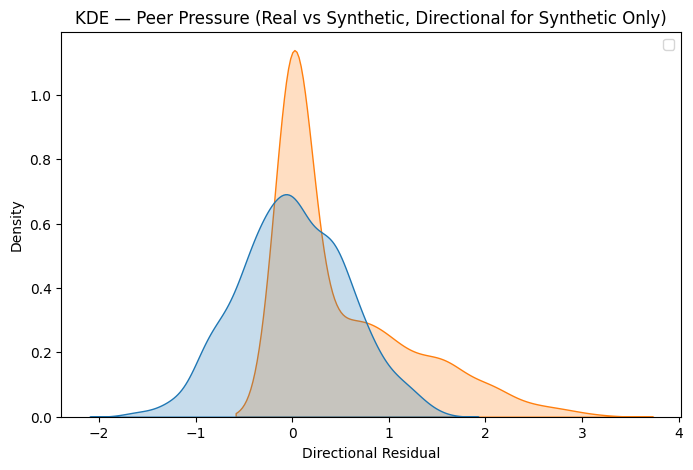

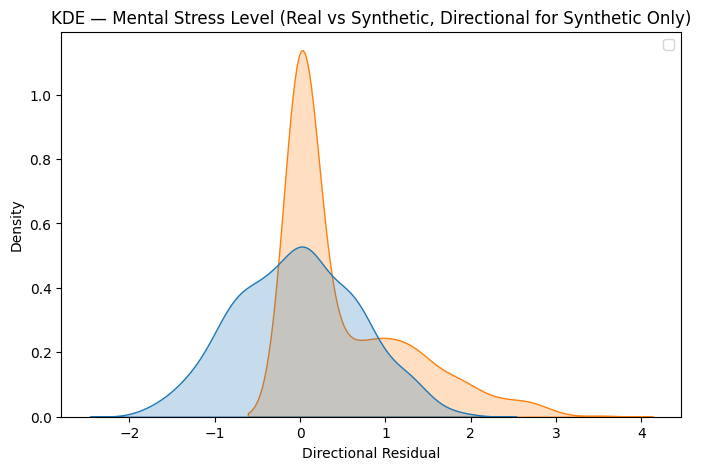

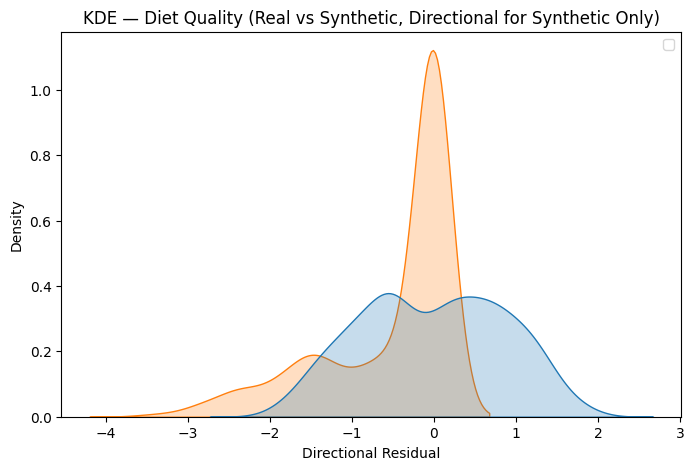

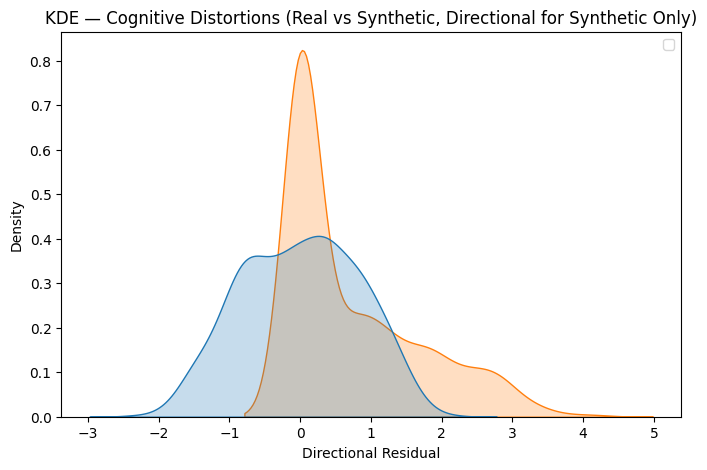

In [118]:
# ============================================================
# KDE FOR EACH FEATURE (REAL residuals vs SYN directional residuals)
# ============================================================

# Convert matrices to DataFrames for plotting
real_df = pd.DataFrame(R_real, columns=ae_cols)
real_df["Group"] = "Real"

syn_df = pd.DataFrame(R_syn_dir, columns=ae_cols)
syn_df["Group"] = "Synthetic"

# Combine both groups
kde_df = pd.concat([real_df, syn_df], axis=0)

# Melt into long format for seaborn
kde_long = kde_df.melt(
    id_vars="Group",
    var_name="Feature",
    value_name="Directional_Residual"
)

# Plot each feature KDE
for feat in ae_cols:
    plt.figure(figsize=(8, 5))

    sub = kde_long[kde_long["Feature"] == feat]

    sns.kdeplot(
        data=sub,
        x="Directional_Residual",
        hue="Group",
        fill=True,
        common_norm=False
    )

    plt.title(f"KDE — {feat} (Real vs Synthetic, Directional for Synthetic Only)")
    plt.xlabel("Directional Residual")
    plt.ylabel("Density")
    plt.legend()
    plt.show()


In [119]:
# ==========================================
# 1) Pearson correlation: Risk vs each feature
# ==========================================
corrs = {}
for col in numeric_cols:
    corrs[col] = df_real[[col, "Directional_Risk"]].corr().iloc[0,1]

corr_df = pd.DataFrame.from_dict(corrs, orient="index", columns=["Correlation"])
corr_df.sort_values("Correlation", ascending=False)


,Correlation
Financial Stress,0.108893
Study Hours Per Week,0.061683
Diet Quality,0.048324
Peer Pressure,0.034541
Physical Exercise (Hours per week),0.031915
Mental Stress Level,-0.004159
Sleep Duration (Hours per night),-0.008700
Family Support,-0.016790
Social Media Usage (Hours per day),-0.017114
Cognitive Distortions,-0.027474


In [120]:
# ==========================================
# 2) Compare risk means across groups
# ==========================================
import scipy.stats as stats

for col in numeric_cols:
    # Split into high/low groups based on median
    median_val = df_real[col].median()
    low_grp  = df_real[df_real[col] <  median_val]["Directional_Risk"]
    high_grp = df_real[df_real[col] >= median_val]["Directional_Risk"]

    t, p = stats.ttest_ind(low_grp, high_grp, equal_var=False)
    print(f"{col}:   p = {p:.5f}")


Study Hours Per Week:   p = 0.24545
Social Media Usage (Hours per day):   p = 0.16045
Sleep Duration (Hours per night):   p = 0.91152
Physical Exercise (Hours per week):   p = 0.49047
Family Support  :   p = 0.09087
Financial Stress:   p = 0.00265
Peer Pressure:   p = 0.64556
Mental Stress Level:   p = 0.48921
Diet Quality:   p = 0.77291
Cognitive Distortions:   p = 0.15958


In [121]:
# ==========================================
# 3) Spearman monotonic correlation
# ==========================================
spearman_corr = {}

for col in numeric_cols:
    rho, p = stats.spearmanr(df_real[col], df_real["Directional_Risk"])
    spearman_corr[col] = rho

pd.DataFrame.from_dict(spearman_corr, orient="index", columns=["Spearman_rho"])


,Spearman_rho
Study Hours Per Week,0.052724
Social Media Usage (Hours per day),-0.028331
Sleep Duration (Hours per night),0.007937
Physical Exercise (Hours per week),0.012598
Family Support,-0.025081
Financial Stress,0.125114
Peer Pressure,0.038479
Mental Stress Level,-0.024973
Diet Quality,0.047152
Cognitive Distortions,-0.019849


In [122]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import roc_auc_score

results = []

# Extract class groups
class0 = df_real[df_real["Needs_Support"] == 0]
class1 = df_real[df_real["Needs_Support"] == 1]

def cohens_d(a, b):
    return (a.mean() - b.mean()) / np.sqrt((a.var() + b.var()) / 2)

for col in numeric_cols:

    x0 = class0[col]
    x1 = class1[col]

    # Means
    mean0 = x0.mean()
    mean1 = x1.mean()

    # Variances
    var0 = x0.var()
    var1 = x1.var()

    # Significance test (non-parametric if needed)
    try:
        t, p = stats.ttest_ind(x0, x1, equal_var=False)
    except:
        t, p = np.nan, np.nan

    # Non-parametric test (more robust)
    u, p_u = stats.mannwhitneyu(x0, x1, alternative="two-sided")

    # Effect size
    d = cohens_d(x1, x0)

    # Direction (higher in class1 or class0?)
    if mean1 > mean0:
        direction = "Higher in Class 1 (harmful ↑)"
    elif mean1 < mean0:
        direction = "Higher in Class 0 (protective ↑)"
    else:
        direction = "Equal"

    # Discrimination power (AUC)
    try:
        auc = roc_auc_score(df_real["Needs_Support"], df_real[col])
    except:
        auc = np.nan

    results.append({
        "Feature": col,
        "Mean_Class0": mean0,
        "Mean_Class1": mean1,
        "Direction": direction,
        "Cohen_d": d,
        "t-test_p": p,
        "MannWhitney_p": p_u,
        "AUC": auc
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values("Cohen_d", ascending=False)
results_df


,Feature,Mean_Class0,Mean_Class1,Direction,Cohen_d,t-test_p,MannWhitney_p,AUC
5,Financial Stress,2.950877,3.231579,Higher in Class 1 (harmful ↑),0.193847,0.021251,0.021186,0.554621
0,Study Hours Per Week,28.442105,31.194737,Higher in Class 1 (harmful ↑),0.146809,0.091337,0.075927,0.542946
3,Physical Exercise (Hours per week),4.885965,5.078947,Higher in Class 1 (harmful ↑),0.061262,0.474218,0.448696,0.518259
8,Diet Quality,3.021053,3.105263,Higher in Class 1 (harmful ↑),0.055726,0.521546,0.467943,0.517207
2,Sleep Duration (Hours per night),8.068421,8.168421,Higher in Class 1 (harmful ↑),0.038078,0.653150,0.631325,0.511542
6,Peer Pressure,2.978947,2.994737,Higher in Class 1 (harmful ↑),0.011080,0.897181,0.885240,0.503426
7,Mental Stress Level,5.364912,5.357895,Higher in Class 0 (protective ↑),-0.002324,0.978673,0.883973,0.496482
1,Social Media Usage (Hours per day),4.284211,4.084211,Higher in Class 0 (protective ↑),-0.075122,0.386986,0.446324,0.481685
4,Family Support,3.007018,2.868421,Higher in Class 0 (protective ↑),-0.094149,0.280021,0.202782,0.469811
9,Cognitive Distortions,3.061404,2.847368,Higher in Class 0 (protective ↑),-0.141874,0.107565,0.078151,0.458236


In [123]:
from scipy.stats import ks_2samp

ks_stat, ks_p = ks_2samp(risk_real, risk_syn)
print("KS Statistic:", ks_stat)
print("p-value:", ks_p)


KS Statistic: 0.3967543859649123
p-value: 1.1383608809712602e-47


In [124]:
from sklearn.metrics import roc_auc_score

labels = np.concatenate([np.zeros_like(risk_real), np.ones_like(risk_syn)])
scores = np.concatenate([risk_real, risk_syn])

auc = roc_auc_score(labels, scores)
print("AUC (Real vs Synthetic):", auc)


AUC (Real vs Synthetic): 0.702953947368421


In [125]:
import numpy as np
import pandas as pd

# Combine risks into one DataFrame
all_scores = pd.DataFrame({
    "risk": scores,
    "label": labels  # 0=real, 1=synthetic
})

# Sort by descending risk
all_scores = all_scores.sort_values("risk", ascending=False).reset_index(drop=True)

Ks = [1, 5, 10, 20, 30, 40]  # percentages
enrichment = []

for K in Ks:
    top_k = all_scores.iloc[:int(len(all_scores)*(K/100))]
    pct_anomalies = top_k["label"].mean() * 100
    enrichment.append((K, pct_anomalies))

enrichment


[(1, np.float64(100.0)),
 (5, np.float64(100.0)),
 (10, np.float64(98.52941176470588)),
 (20, np.float64(87.86764705882352)),
 (30, np.float64(75.24509803921569)),
 (40, np.float64(65.25735294117648))]

In [126]:
from sklearn.utils import resample
from scipy.stats import kendalltau

def bootstrap_stability(X, n_runs=10, sample_frac=0.8):

    rankings = []

    for i in range(n_runs):
        # Resample REAL DATA only
        idx = np.random.choice(len(X), int(len(X)*sample_frac), replace=True)
        X_boot = X[idx]

        # retrain AE here if you want — OR compute risk if AE fixed
        recon = auto.predict(X_boot)
        risk = ((X_boot - recon)**2).mean(axis=1)

        rankings.append(np.argsort(risk))  # risk ranking

    # compute Kendall Tau between all pairs
    taus = []
    for i in range(n_runs):
        for j in range(i+1, n_runs):
            tau, _ = kendalltau(rankings[i], rankings[j])
            taus.append(tau)

    return np.mean(taus), np.std(taus)

tau_mean, tau_std = bootstrap_stability(real_scaled)
print("Bootstrap Rank Stability (mean tau):", tau_mean)
print("std:", tau_std)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Bootstrap Rank Stability (mean tau): -0.0031881942638033864
std: 0.02638100984626379


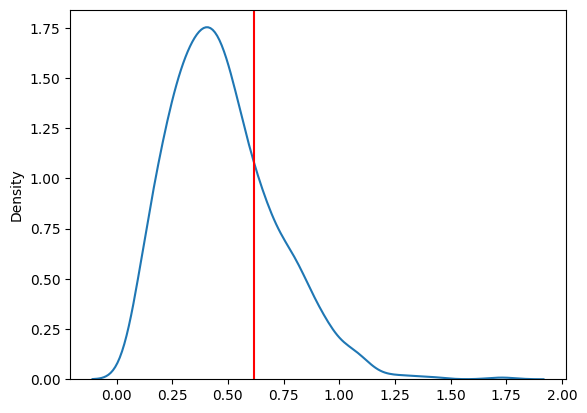

In [127]:
sns.kdeplot(risk_real)
plt.axvline(thr, color='red')


#xgboost + synthetic

In [128]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_real.drop([col for col in ["Risk_Score", "Needs_Support"] if col in df_real.columns], axis=1)
y = df_real["Needs_Support"]

# Identify and drop non-numeric/object columns that XGBoost cannot handle by default.
# 'Student ID' and 'Gender' are specifically mentioned in the error output.
# 'Age' was previously part of useless_columns but was also part of numeric_cols, so it should be scaled.
# 'Substance Use' and 'Relationship Stress' should also be dropped if they exist as objects.
# We'll explicitly remove them to ensure clean input.
rows_to_drop = ['Student ID', 'Gender', 'Substance Use', 'Relationship Stress']
X = X.drop(columns=[col for col in rows_to_drop if col in X.columns])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scale = float(np.sum(y_train == 0) / np.sum(y_train == 1))

model = XGBClassifier(
    n_estimators=600,
    learning_rate=0.03,
    max_depth=6,
    min_child_weight=1,
    subsample=0.6,
    colsample_bytree=0.6,
    reg_lambda=1.0,
    reg_alpha=0.01,
    gamma=0.1,
    scale_pos_weight=scale,   # handle imbalance
    eval_metric="aucpr",
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        47

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190


Confusion Matrix:
 [[143   0]
 [  0  47]]


In [129]:
def print_support_model_results(y_train, y_train_pred, y_train_proba,
                                y_test, y_test_pred, y_test_proba,
                                model_name="Support Model"):

    print(f"\n=== {model_name.upper()} RESULTS ===")

 # Ensure probabilities are for class 1
    if len(np.shape(y_train_proba)) > 1:
        y_train_proba = y_train_proba[:, 1]
    if len(np.shape(y_test_proba)) > 1:
        y_test_proba = y_test_proba[:, 1]

    print("\n[TRAIN RESULTS]")
    print(classification_report(y_train, y_train_pred, digits=4))
    try:
        print("ROC AUC (train):", round(roc_auc_score(y_train, y_train_proba), 4))
    except:
        print("ROC AUC (train): Not applicable")

    print("\n[TEST RESULTS]")
    print(classification_report(y_test, y_test_pred, digits=4))
    try:
        print("ROC AUC (test):", round(roc_auc_score(y_test, y_test_proba), 4))
    except:
        print("ROC AUC (test): Not applicable")


In [130]:
y_train_pred = model.predict(X_train)

# Show the optimized-threshold results neatly
print_support_model_results(
    y_train, y_train_pred, probs_train,
    y_test,  y_pred,  probs_test,
    model_name="Support Model (Threshold Optimized)"
)


=== SUPPORT MODEL (THRESHOLD OPTIMIZED) RESULTS ===

[TRAIN RESULTS]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       427
           1     1.0000    1.0000    1.0000       143

    accuracy                         1.0000       570
   macro avg     1.0000    1.0000    1.0000       570
weighted avg     1.0000    1.0000    1.0000       570

ROC AUC (train): 1.0

[TEST RESULTS]
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       143
           1     1.0000    1.0000    1.0000        47

    accuracy                         1.0000       190
   macro avg     1.0000    1.0000    1.0000       190
weighted avg     1.0000    1.0000    1.0000       190

ROC AUC (test): 0.9201


In [131]:
probs_train = model.predict_proba(X_train)
probs_test = model.predict_proba(X_test)

#Directional UNIVARIATE AUTOENCODER

In [177]:
import joblib
import json
import tensorflow as tf

# 1) Save Autoencoder
auto.save("autoencoder_modell.h5")

# 2) Save the scaler
joblib.dump(scaler, "scalerr.pkl")

# 3) Save AE feature order
with open("ae_columnss.json", "w") as f:
    json.dump(ae_cols, f)


In [178]:
import joblib
import json
import tensorflow as tf

# Load model WITHOUT compiling
auto = tf.keras.models.load_model(
    "autoencoder_modell.h5",
    compile=False
)

# Load scaler
scaler = joblib.load("scalerr.pkl")

# Load AE column order
with open("ae_columnss.json", "r") as f:
    ae_cols = json.load(f)


In [147]:
# ============================
# Directional Univariate Risk
# ============================

feature_means = df_real[numeric_cols].mean().to_dict()
feature_stds  = df_real[numeric_cols].std().to_dict()

# features where HIGH = bad
high_bad = [
    "Mental Stress Level",
    "Cognitive Distortions",
    "Financial Stress",
    "Peer Pressure",
    "Social Media Usage (Hours per day)"
]

# features where LOW = bad
low_bad = [
    "Sleep Duration (Hours per night)",
    "Family Support ",
    "Diet Quality",
    "Physical Exercise (Hours per week)",
    "Study Hours Per Week"
]

def directional_univariate_risk(student_dict):

    risks = {}

    for col in numeric_cols:
        value = student_dict[col]
        mean = feature_means[col]
        std  = feature_stds[col]

        if std == 0:
            continue

        # -------- HIGH BAD --------
        if col in high_bad:
            z = (value - mean) / std
            if z > 1:
                risks[col] = z

        # -------- LOW BAD --------
        elif col in low_bad:
            z = (mean - value) / std
            if z > 1:
                risks[col] = z

    if len(risks) == 0:
        return 0, None   # no harmful feature found

    # get highest harmful feature
    stress_type = max(risks, key=risks.get)
    return max(risks.values()), stress_type


In [154]:
def get_primary_stress_type(student_dict):
    scores = {}

    for col in numeric_cols:
        value = student_dict[col]
        mean = feature_means[col]
        std  = feature_stds[col]

        if std == 0:
            continue

        # high-bad
        if col in high_bad:
            z = (value - mean) / std
            if z > 1:
                scores[col] = z

        # low-bad
        elif col in low_bad:
            z = (mean - value) / std
            if z > 1:
                scores[col] = z

    if len(scores) == 0:
        return None

    # Return feature with highest Z-score → most harmful
    return max(scores, key=scores.get)


In [162]:
# ============================
# Hybrid Prediction Function
# ============================

def predict_student(student_dict):

    # 1) AE Risk
    X = preprocess_student(student_dict)
    recon = auto.predict(X, verbose=0)
    ae_risk = ((X - recon)**2).mean(axis=1)[0]

    # 2) Directional Univariate Risk
    uni_risk_score, _ = directional_univariate_risk(student_dict)

    # 3) Combine Risks
    final_risk = (0.6 * ae_risk) + (0.4 * uni_risk_score)

    # 4) Threshold
    label = 1 if final_risk >= thr else 0

    # 5) NEW → Identify primary stress factor
    primary_stress = get_primary_stress_type(student_dict)

    return final_risk, label, primary_stress


#UNIVARIATE EVALUATION

In [144]:
# ============================================
# EVALUATION: Directional Univariate Risk Only
# ============================================

import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score

print("Evaluating Directional Univariate Risk...\n")

# 1) Compute risks for real and synthetic (already computed earlier)
# Assuming uni_risk_real and uni_risk_syn are pandas Series where each element is a (risk_value, risk_source) tuple
uni_real_scores = np.array([x[0] for x in uni_risk_real.values])
uni_syn_scores  = np.array([x[0] for x in uni_risk_syn.values])

# -------------------------
# KS Test
# -------------------------
ks_stat_uni, ks_p_uni = ks_2samp(uni_real_scores, uni_syn_scores) # Use _scores versions
print("KS Statistic (Univariate):", ks_stat_uni)
print("p-value:", ks_p_uni)

# -------------------------
# AUC
# -------------------------
labels_uni = np.concatenate([np.zeros_like(uni_real_scores), np.ones_like(uni_syn_scores)])
scores_uni = np.concatenate([uni_real_scores, uni_syn_scores])

auc_uni = roc_auc_score(labels_uni, scores_uni)
print("AUC (Real vs Synthetic):", auc_uni)

# -------------------------
# Enrichment (Top-K)
# -------------------------
all_scores_uni = pd.DataFrame({
    "risk": scores_uni,
    "label": labels_uni
}).sort_values("risk", ascending=False).reset_index(drop=True)

Ks = [1, 5, 10, 20, 30, 40]
enrich_uni = []

for K in Ks:
    top_k = all_scores_uni.iloc[:int(len(all_scores_uni)*(K/100))]
    pct = top_k["label"].mean() * 100
    enrich_uni.append((K, pct))

print("\nTop-K Enrichment (Univariate):")
for k, p in enrich_uni:
    print(f"Top {k}% \u2192 {p:.2f}% synthetic")

# -------------------------
# Mean risk per feature (real vs synthetic)
# -------------------------
uni_feat_real = df_real[numeric_cols].mean()
uni_feat_syn  = synthetic_df[numeric_cols].mean()

mean_table_uni = pd.DataFrame({
    "Feature": numeric_cols,
    "Real_Mean": uni_feat_real.values,
    "Synthetic_HighRisk_Mean": uni_feat_syn.values
})

print("\nMean Comparison Table (Directional Univariate):")
display(mean_table_uni)


Evaluating Directional Univariate Risk...

KS Statistic (Univariate): 0.49236842105263157
p-value: 2.4262361546186294e-74
AUC (Real vs Synthetic): 0.7642543859649122

Top-K Enrichment (Univariate):
Top 1% → 100.00% synthetic
Top 5% → 100.00% synthetic
Top 10% → 100.00% synthetic
Top 20% → 100.00% synthetic
Top 30% → 80.15% synthetic
Top 40% → 62.68% synthetic

Mean Comparison Table (Directional Univariate):


,Feature,Real_Mean,Synthetic_HighRisk_Mean
0,Study Hours Per Week,29.130263,10.692787
1,Social Media Usage (Hours per day),4.234211,6.028399
2,Sleep Duration (Hours per night),8.093421,4.045745
3,Physical Exercise (Hours per week),4.934211,0.801275
4,Family Support,2.972368,1.733488
5,Financial Stress,3.021053,4.298391
6,Peer Pressure,2.982895,4.091425
7,Mental Stress Level,5.363158,4.589159
8,Diet Quality,3.042105,2.022859
9,Cognitive Distortions,3.007895,4.305908


#DEMO

In [163]:
import joblib
import json
import tensorflow as tf
import pandas as pd
import numpy as np

# Load autoencoder
auto = tf.keras.models.load_model("autoencoder_model.h5", compile=False)

# Load scaler
scaler = joblib.load("scaler.pkl")

# Load preprocess info
with open("preprocess_info.json","r") as f:
    info = json.load(f)

numeric_cols = info["numeric_cols"]
binary_cols  = info["binary_cols"]
drop_cols    = info["drop_cols"]

print("Demo environment loaded.")


Demo environment loaded.


In [164]:
# Dictionary that stores the range of each question
feature_ranges = {
    "Study Hours Per Week": "0–70 hours",
    "Social Media Usage (Hours per day)": "0–12 hours",
    "Sleep Duration (Hours per night)": "0–12 hours",
    "Physical Exercise (Hours per week)": "0–15 hours",
    "Family Support": "1–5 (1=very low, 5=very high)",
    "Financial Stress": "1–5 (1=none, 5=extreme)",
    "Peer Pressure": "1–5 (1=low, 5=high)",
    "Mental Stress Level": "1–5 (1=low, 5=high)",
    "Diet Quality": "1–5 (1=poor, 5=excellent)",
    "Cognitive Distortions": "1–5 (1=low, 5=high)"
}

def input_student():
    print("\nEnter the student's data:")
    data = {}

    for col in numeric_cols:
        rng = feature_ranges.get(col, "")
        value = float(input(f"{col} [{rng}]: "))
        data[col] = value

    risk, label, stress_type = predict_student(data)

    print("\n----- RESULT -----")
    print("Risk Score:", risk)
    print("Needs Support:", "YES (1)" if label == 1 else "NO (0)")

    if stress_type is not None:
        print("Primary Stress Factor:", stress_type)
    else:
        print("Primary Stress Factor: None detected")

    print("---------------------\n")


In [165]:
input_student()


Enter the student's data:
Study Hours Per Week [0–70 hours]: 30
Social Media Usage (Hours per day) [0–12 hours]: 8
Sleep Duration (Hours per night) [0–12 hours]: 4
Physical Exercise (Hours per week) [0–15 hours]: 2
Family Support   []: 4
Financial Stress [1–5 (1=none, 5=extreme)]: 1
Peer Pressure [1–5 (1=low, 5=high)]: 1
Mental Stress Level [1–5 (1=low, 5=high)]: 5
Diet Quality [1–5 (1=poor, 5=excellent)]: 4
Cognitive Distortions [1–5 (1=low, 5=high)]: 5

----- RESULT -----
Risk Score: 1.1954782989886734
Needs Support: YES (1)
Primary Stress Factor: Sleep Duration (Hours per night)
---------------------



In [166]:
!pip install gradio

In [168]:
# ---- return the dominant harmful factor name for a student dict ----
def top_stress_type(student_dict):
    # same lists you already use
    high_bad = [
        "Mental Stress Level","Cognitive Distortions","Financial Stress",
        "Peer Pressure","Social Media Usage (Hours per day)"
    ]
    low_bad = [
        "Sleep Duration (Hours per night)","Family Support  ",
        "Diet Quality","Physical Exercise (Hours per week)","Study Hours Per Week"
    ]
    means = {c: feature_means[c] for c in numeric_cols}
    stds  = {c: feature_stds[c]  for c in numeric_cols}

    scores = {}
    for col in numeric_cols:
        v, m, s = student_dict[col], means[col], stds[col]
        if s == 0:
            continue
        if col in high_bad:
            z = max(0.0, (v - m)/s)
        elif col in low_bad:
            z = max(0.0, (m - v)/s)
        else:
            z = 0.0
        scores[col] = z

    if not scores or max(scores.values()) <= 0:
        return None
    return max(scores, key=scores.get)


In [174]:
!pip -q install gradio==4.44.0

import gradio as gr
import numpy as np

# input ranges shown to the user
RANGES = {
    "Study Hours Per Week": (0, 70),
    "Social Media Usage (Hours per day)": (0, 12),
    "Sleep Duration (Hours per night)": (0, 12),
    "Physical Exercise (Hours per week)": (0, 15),
    "Family Support  ": (1, 5),              # note the two spaces to match your df
    "Financial Stress": (1, 5),
    "Peer Pressure": (1, 5),
    "Mental Stress Level": (1, 5),
    "Diet Quality": (1, 5),
    "Cognitive Distortions": (1, 5),
}

def predict_api(*vals):
    try:
        # Build input dictionary in AE column order
        data = {col: float(val) for col, val in zip(numeric_cols, vals)}

        # Get AE + directional prediction
        risk, label = predict_student(data)

        # Get top stress factor
        stress = top_stress_type(data)
        stress = stress if stress is not None else "None detected"

        return {
            "Risk Score": float(risk),
            "Needs Support (0/1)": int(label),
            "Primary Stress Factor": stress
        }

    except Exception as e:
        return {"error": str(e)}


# --------- build inputs with visible ranges ----------
inputs=[
    gr.Number(label="Study Hours Per Week [0–70]", minimum=0, maximum=70),
    gr.Number(label="Social Media Usage (Hours per day) [0–12]", minimum=0, maximum=12),
    gr.Number(label="Sleep Duration (Hours per night) [0–12]", minimum=0, maximum=12),
    gr.Number(label="Physical Exercise (Hours per week) [0–15]", minimum=0, maximum=15),
    gr.Number(label="Family Support [1–5]", minimum=1, maximum=5),
    gr.Number(label="Financial Stress [1–5]", minimum=1, maximum=5),
    gr.Number(label="Peer Pressure [1–5]", minimum=1, maximum=5),
    gr.Number(label="Mental Stress Level [1–5]", minimum=1, maximum=5),
    gr.Number(label="Diet Quality [1–5]", minimum=1, maximum=5),
    gr.Number(label="Cognitive Distortions [1–5]", minimum=1, maximum=5)
]

for col in numeric_cols:
    lo, hi = RANGES[col]
    step = 1 if hi <= 15 else 0.5
    inputs.append(
        gr.Slider(minimum=lo, maximum=hi, step=step, value=(lo+hi)/2,
                  label=f"{col}  [range: {lo}–{hi}]")
    )

demo = gr.Interface(
    fn=predict_api,
    inputs=inputs,
    outputs=gr.JSON(label="output"),
    title="Advising Risk (AE + Directional Univariate)",
    description="Enter values within the specified ranges. The model returns risk score, binary label, and the primary stress factor."
)

demo.launch(debug=True, share=True)  # set share=True only during testing


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8b0eadb7b0101c5206.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://8b0eadb7b0101c5206.gradio.live
